# Travel Package Purchase Prediction

Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

1) CustomerID: Unique customer ID
2) ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3) Age: Age of customer
4) TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5) CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6) Occupation: Occupation of customer
7) Gender: Gender of customer
8) NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9) PreferredPropertyStar: Preferred hotel property rating by customer
10) MaritalStatus: Marital status of customer
11) NumberOfTrips: Average number of trips in a year by customer
12) Passport: The customer has a passport or not (0: No, 1: Yes)
13) OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14) NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15) Designation: Designation of the customer in the current organization
16) MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

1) PitchSatisfactionScore: Sales pitch satisfaction score
2) ProductPitched: Product pitched by the salesperson
3) NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4) DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [1]:
#pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None) # display all columns
pd.set_option("display.max_rows", 200)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
data=pd.read_excel("Tourism.xlsx", sheet_name="Tourism" )

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
print(f"Thre are {data.shape[0]} rows and {data.shape[1]} columns in the data")

Thre are 4888 rows and 20 columns in the data


In [6]:
data.isnull().sum().sort_values() # there are missing values on the Age, DurationOfPitch, NumberOfFollowups, NumberOfTrips,NumberOfChildrenVisiting, and MonthlyIncome  

CustomerID                    0
ProdTaken                     0
OwnCar                        0
CityTier                      0
PitchSatisfactionScore        0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
Designation                   0
ProductPitched                0
MaritalStatus                 0
Passport                      0
TypeofContact                25
PreferredPropertyStar        26
NumberOfFollowups            45
NumberOfChildrenVisiting     66
NumberOfTrips               140
Age                         226
MonthlyIncome               233
DurationOfPitch             251
dtype: int64

In [7]:
data.duplicated().sum() # there is no duplicated row

0

In [8]:
data.dtypes # Data types of the variables are integer, float, and object; some variables should be categorical

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [9]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4888,NaN,NaN,NaN,202444,1411.19,200000,201222,202444,203665,204887
ProdTaken,4888,NaN,NaN,NaN,0.188216,0.390925,0,0,0,0,1
Age,4662,NaN,NaN,NaN,37.6223,9.31639,18,31,36,44,61
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888,NaN,NaN,NaN,1.65426,0.916583,1,1,1,3,3
DurationOfPitch,4637,NaN,NaN,NaN,15.4908,8.51964,5,9,13,20,127
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888,NaN,NaN,NaN,2.90507,0.724891,1,2,3,3,5
NumberOfFollowups,4843,NaN,NaN,NaN,3.70845,1.00251,1,3,4,4,6


In [10]:
df=data.copy()

#### Observation

1)There are 4888 rows and 20 columns in the data set.
2) There are missing values on some columns that should be handled.
3) There are no duplicated rows.
4) Some columns have float or integer data types which should be converted to categorical.
5) Age ranged from 18 to 61 years, and the mean score of age is 37.6.
6) There are 3 unique genders and 4 marital statuses.
7) CustomerID column should be dropped.

### Data Prosessing

In [11]:
df=df.drop(["CustomerID"], axis=1)

In [12]:
cat_list_col=["ProdTaken","CityTier","PreferredPropertyStar","Passport","OwnCar", "Gender","Occupation","TypeofContact","ProductPitched","MaritalStatus","Designation"]

In [13]:
for column in cat_list_col:
    df[column]=df[column].astype("category")


In [14]:
df.dtypes

ProdTaken                   category
Age                          float64
TypeofContact               category
CityTier                    category
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar       category
MaritalStatus               category
NumberOfTrips                float64
Passport                    category
PitchSatisfactionScore         int64
OwnCar                      category
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

In [15]:
cat_list = list(df.select_dtypes(include=['category']).columns)
cat_list

['ProdTaken',
 'TypeofContact',
 'CityTier',
 'Occupation',
 'Gender',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'Passport',
 'OwnCar',
 'Designation']

In [16]:
for feature in cat_list:
    print(df[feature].value_counts())
    print("#"*70)

0    3968
1     920
Name: ProdTaken, dtype: int64
######################################################################
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
######################################################################
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
######################################################################
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
######################################################################
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
######################################################################
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
######################################################################
3.0    2993
5.0     956
4.0     913
Name: Pre

# EDA

### Univariate Analysis

In [17]:
def labeled_barplot(data, feature, percentage=False, n=None):
    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 6))
    else:
        plt.figure(figsize=(n + 1, 6))

    plt.xticks(rotation=45, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if percentage == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) 
        else:
            label = p.get_height() 

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height() 

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        ) 

    plt.show()  

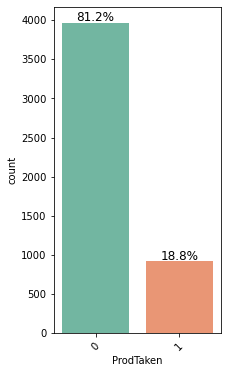

None


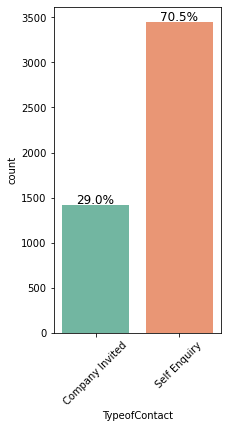

None


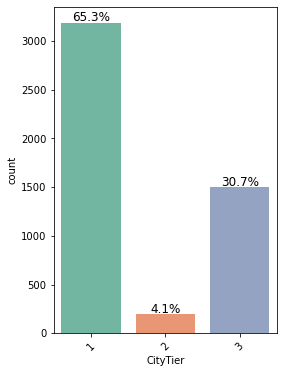

None


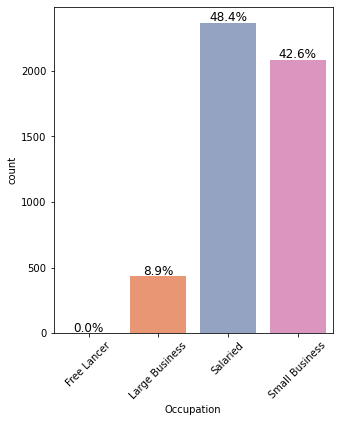

None


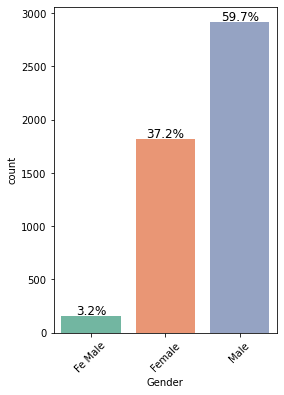

None


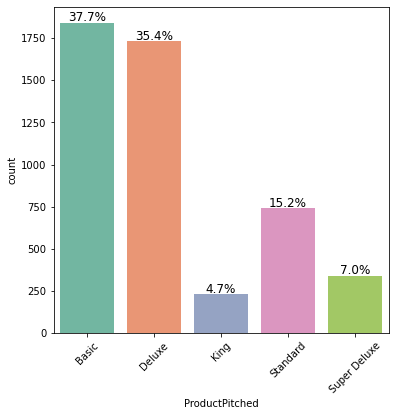

None


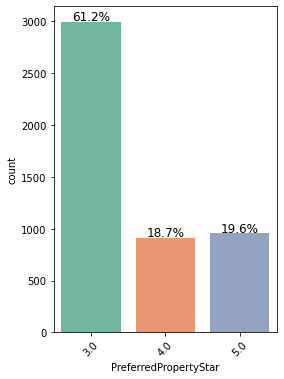

None


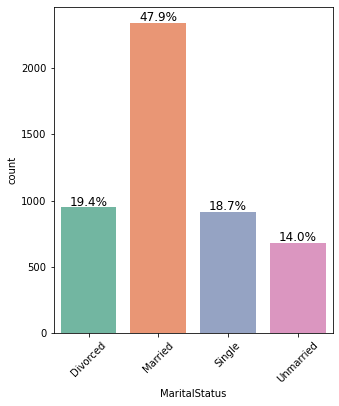

None


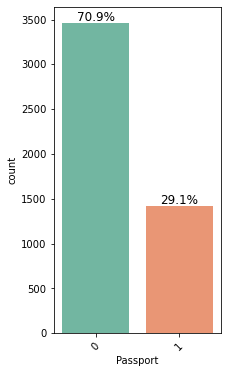

None


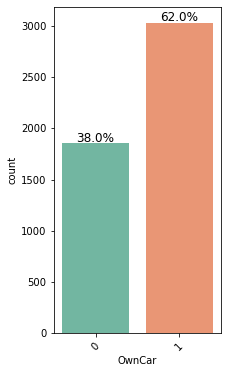

None


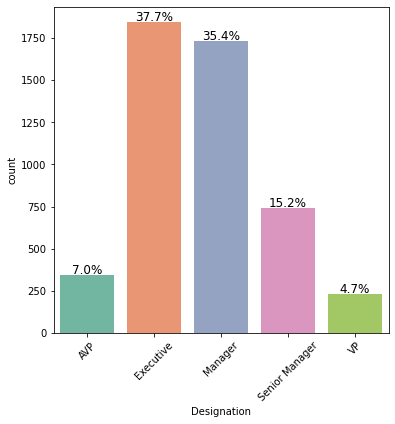

None


In [18]:
for feature in cat_list:
    print(labeled_barplot(df, feature, percentage=True, n=None))

### Observation

1) 81.2% of the customers have not purchased a package. 2) 70.5% of the customers have contacted by themself, self-enquiry. 3) Tier one city (65.3%) is higher than the other tiers. 4) Almost 50% of the customers have a salaried career. 5) 59.7% of the customers are male, Female and Fe male should be merged. 6) Basic and Deluxe are the most popular products among the customers. 7) The customers most prefer Three-stars property. 8) Almost 50% of the customers are married. 9) Most customers (70.9%) do not have a password. 10) 62% of the customers have a car. 11) 37.7% of the customers are executives, and 4.7% are VP.

In [19]:
def boxplot_hitogram(data, feature, figsize=(10, 5), kde=False, bins=None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, 
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellowgreen"
    ) 
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="pink"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="lime", linestyle="-"
    )  
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="--"
    ) 

In [20]:
num_list= list(df.select_dtypes(include=['float64',"int64"]).columns)
num_list

['Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'NumberOfTrips',
 'PitchSatisfactionScore',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

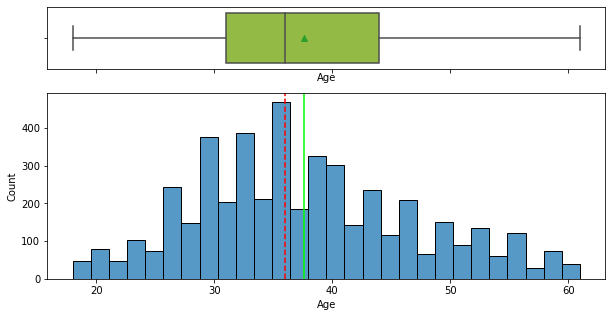

In [21]:
boxplot_hitogram(df, "Age", figsize=(10, 5), kde=False, bins=None)

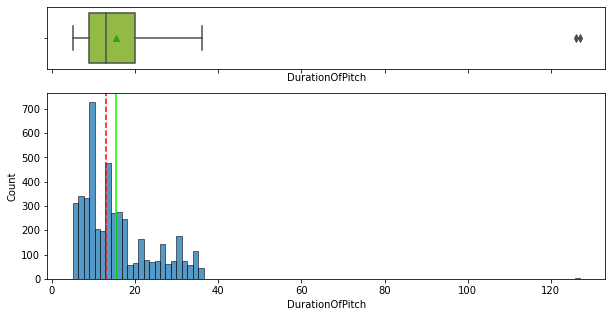

In [22]:
boxplot_hitogram(df, "DurationOfPitch", figsize=(10, 5), kde=False, bins=None)

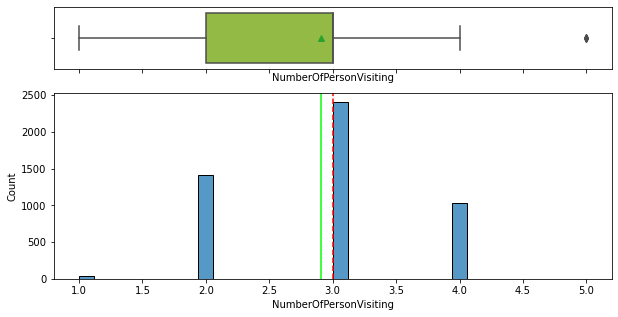

In [23]:
boxplot_hitogram(df, "NumberOfPersonVisiting", figsize=(10, 5), kde=False, bins=None)

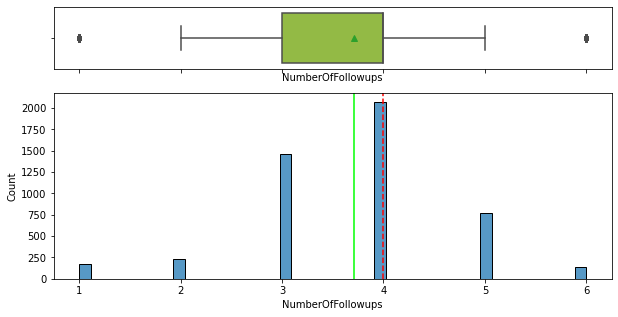

In [24]:
boxplot_hitogram(df, "NumberOfFollowups", figsize=(10, 5), kde=False, bins=None)

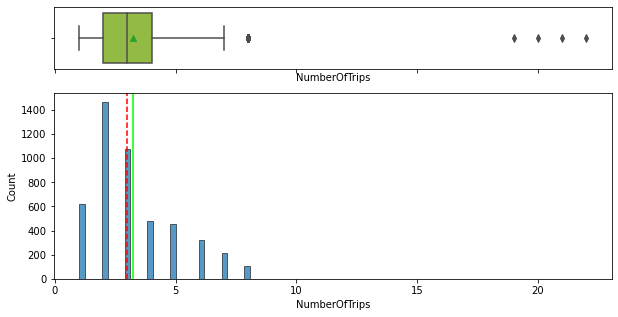

In [25]:
boxplot_hitogram(df, "NumberOfTrips", figsize=(10, 5), kde=False, bins=None)

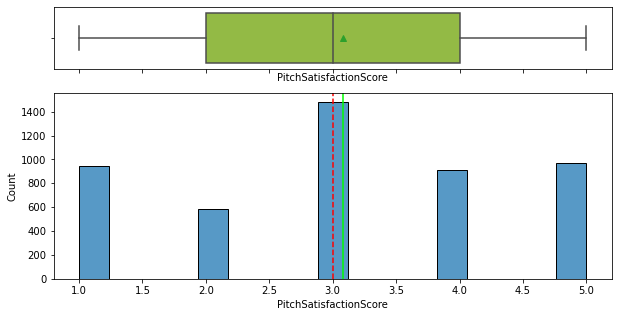

In [26]:
boxplot_hitogram(df, "PitchSatisfactionScore", figsize=(10, 5), kde=False, bins=None)

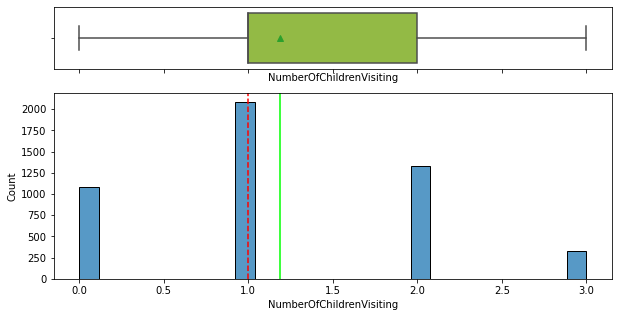

In [27]:
boxplot_hitogram(df, "NumberOfChildrenVisiting", figsize=(10, 5), kde=False, bins=None)

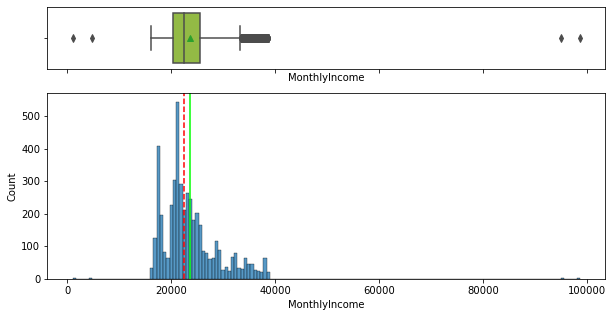

In [28]:
boxplot_hitogram(df, "MonthlyIncome", figsize=(10, 5), kde=False, bins=None)

#### Observation

1) There are no outliers on the age variable.
2) There are outliers on the durationofpitch variable and skewed right.
3) There are outliers for the numberofpersonvisiting and the numberoffollowup variables.
4) The numberoftrips variable has outliers and skewed right.
5) Monthly income variable has outliers.


## Bivariate Analysis

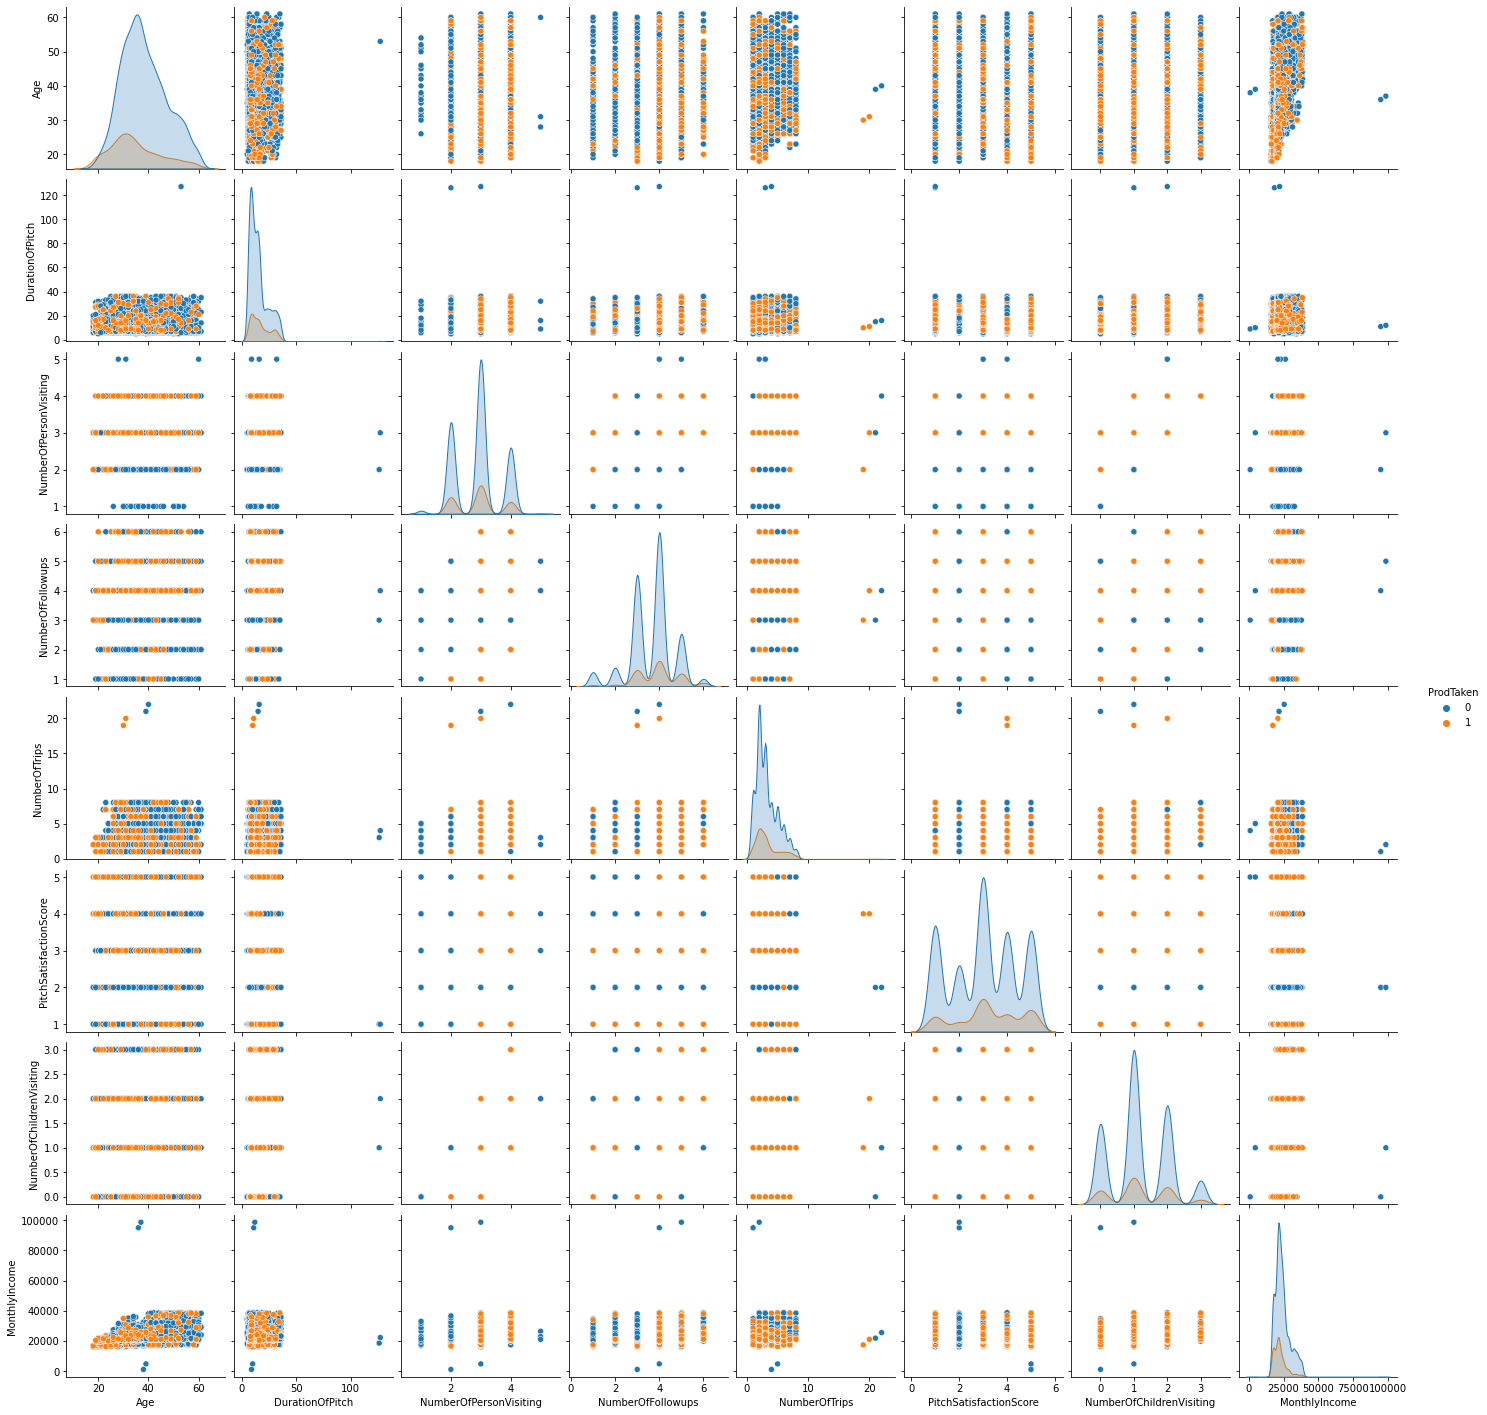

In [29]:
sns.pairplot(df, hue="ProdTaken")
plt.show()

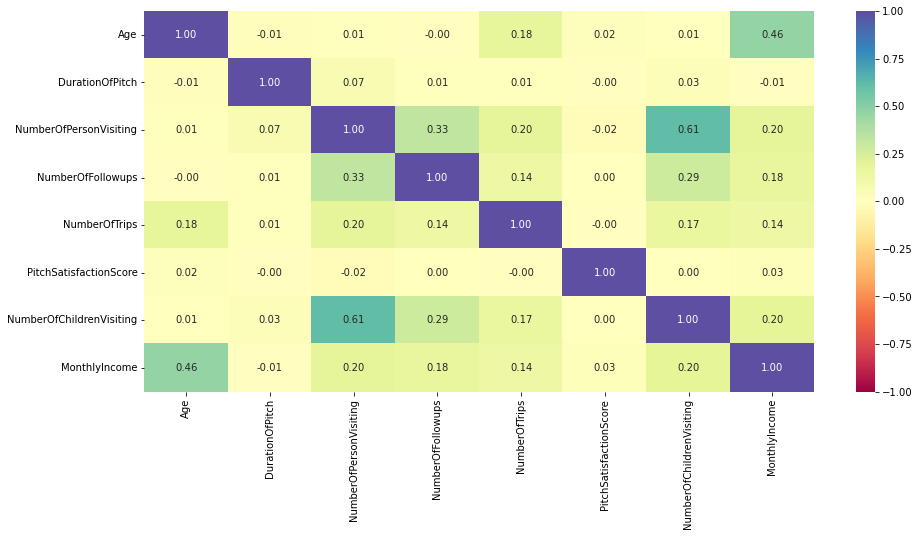

In [30]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

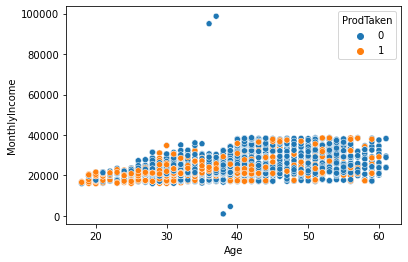

In [31]:
sns.scatterplot(data=df, x="Age", y="MonthlyIncome", hue="ProdTaken")

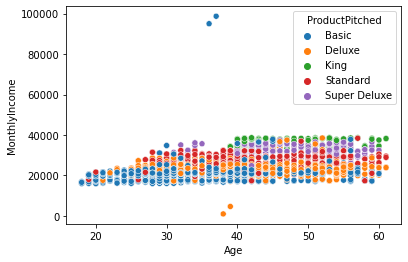

In [32]:
sns.scatterplot(data=df, x="Age", y="MonthlyIncome", hue="ProductPitched")

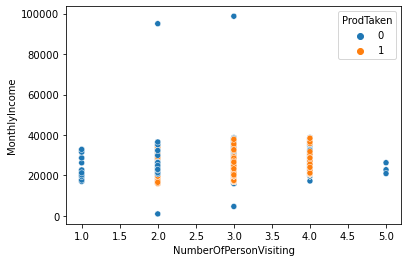

In [33]:
sns.scatterplot(data=df, x="NumberOfPersonVisiting", y="MonthlyIncome", hue="ProdTaken")

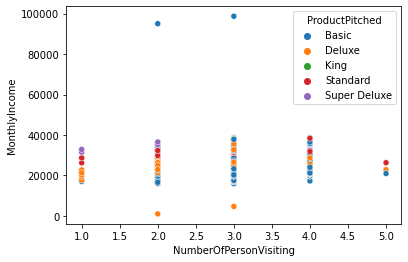

In [34]:
sns.scatterplot(data=df, x="NumberOfPersonVisiting", y="MonthlyIncome", hue="ProductPitched")

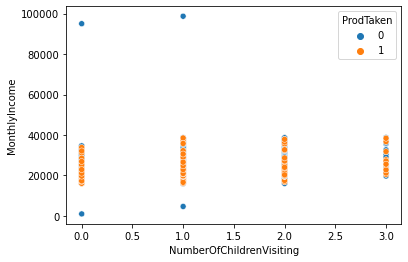

In [35]:
sns.scatterplot(data=df, x="NumberOfChildrenVisiting", y="MonthlyIncome", hue="ProdTaken")

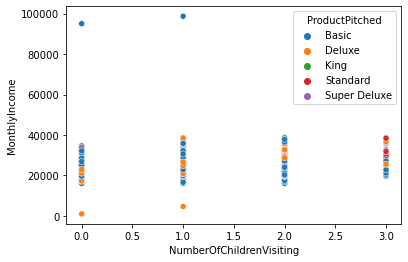

In [36]:
sns.scatterplot(data=df, x="NumberOfChildrenVisiting", y="MonthlyIncome", hue="ProductPitched")

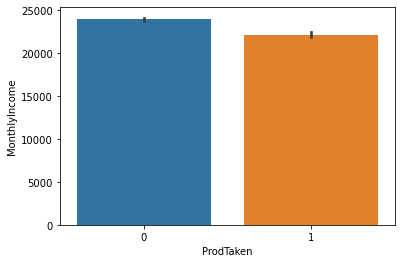

In [37]:
sns.barplot(data=df, x="ProdTaken", y="MonthlyIncome")

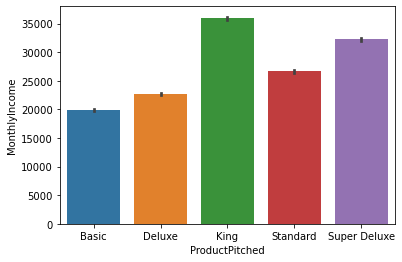

In [38]:
sns.barplot(data=df, x="ProductPitched", y="MonthlyIncome")

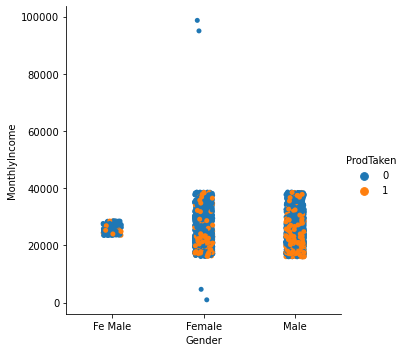

In [39]:
sns.catplot(data=df, x="Gender", y="MonthlyIncome", hue="ProdTaken")

<Figure size 720x360 with 0 Axes>

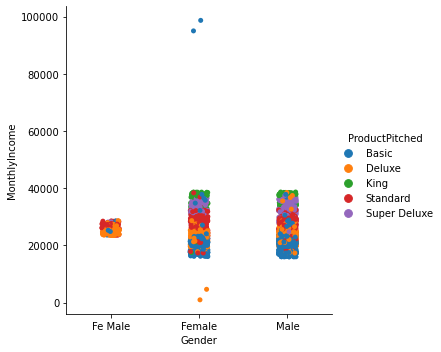

In [40]:
plt.figure(figsize=(10,5))
sns.catplot(data=df, x="Gender", y="MonthlyIncome", hue="ProductPitched")

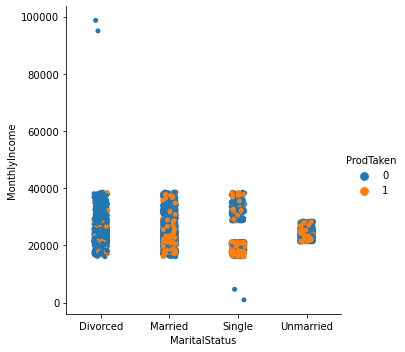

In [41]:
sns.catplot(data=df, x="MaritalStatus", y="MonthlyIncome", hue="ProdTaken")

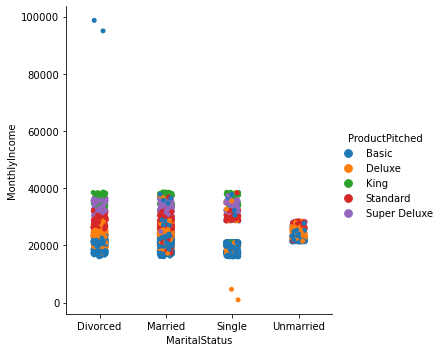

In [42]:
sns.catplot(data=df, x="MaritalStatus", y="MonthlyIncome", hue="ProductPitched")

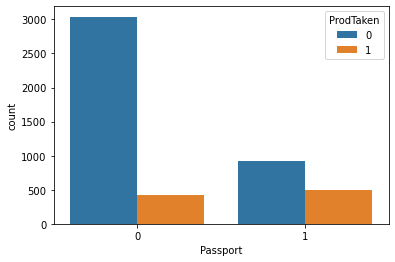

In [43]:
sns.countplot(data=df, x="Passport", hue="ProdTaken")

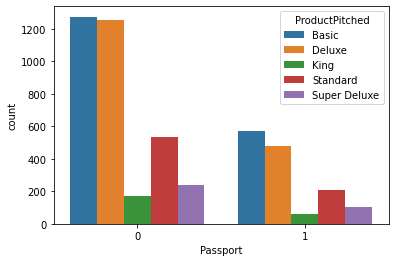

In [44]:
sns.countplot(data=df, x="Passport", hue="ProductPitched")

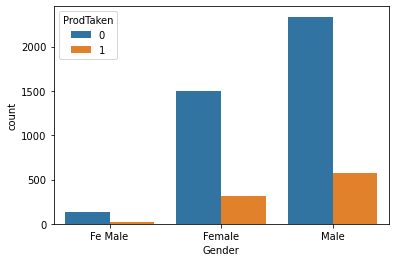

In [45]:
sns.countplot(data=df, x="Gender", hue="ProdTaken")

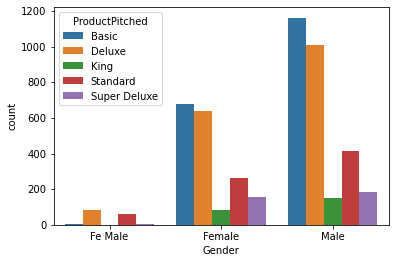

In [46]:
sns.countplot(data=df, x="Gender", hue="ProductPitched")

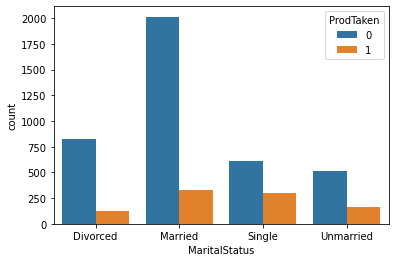

In [47]:
sns.countplot(data=df, x="MaritalStatus", hue="ProdTaken")

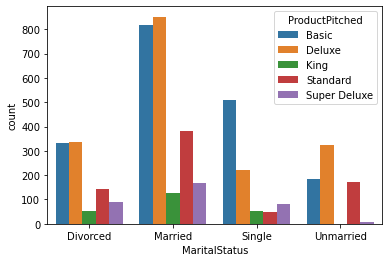

In [48]:
sns.countplot(data=df, x="MaritalStatus", hue="ProductPitched")

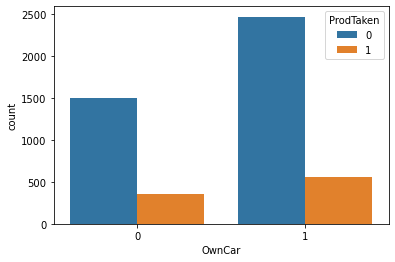

In [49]:
sns.countplot(data=df, x="OwnCar", hue="ProdTaken")

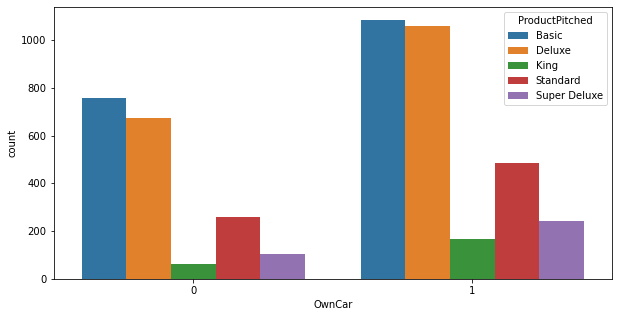

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="OwnCar", hue="ProductPitched")

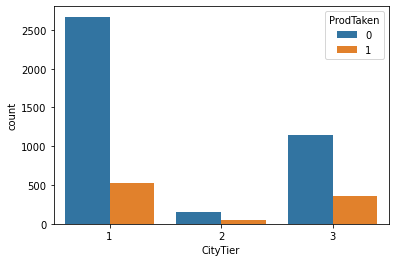

In [51]:
sns.countplot(data=df, x="CityTier", hue="ProdTaken")

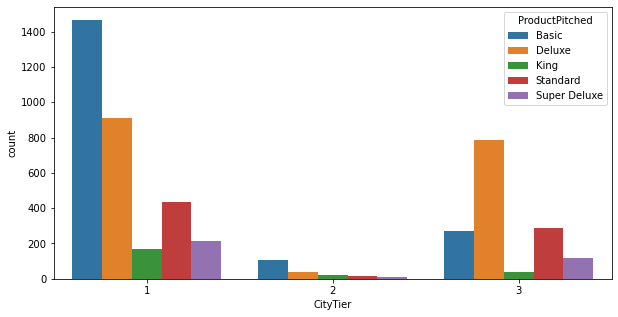

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="CityTier", hue="ProductPitched")


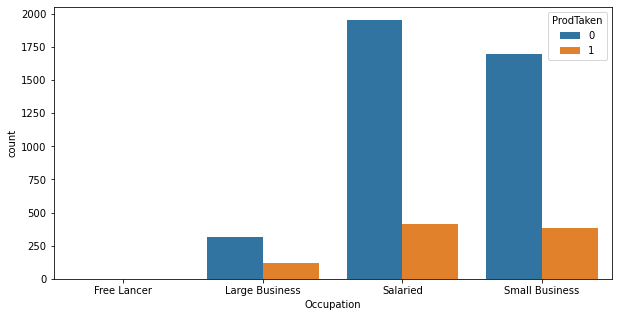

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Occupation", hue="ProdTaken")

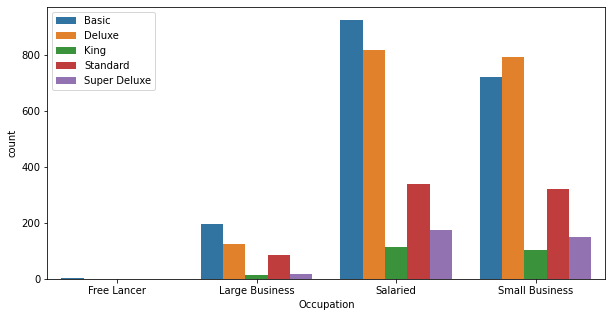

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Occupation", hue="ProductPitched")
plt.legend(loc="upper left")

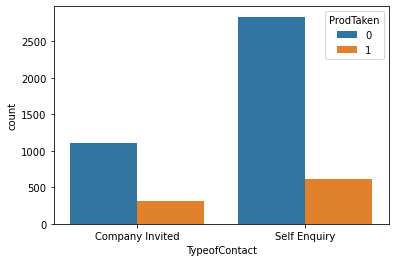

In [55]:
sns.countplot(data=df, x="TypeofContact", hue="ProdTaken")

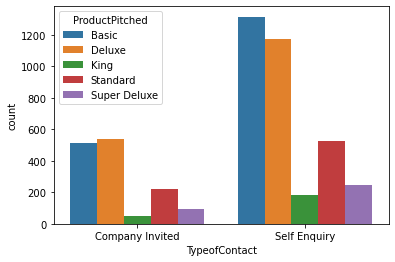

In [56]:
sns.countplot(data=df, x="TypeofContact", hue="ProductPitched")

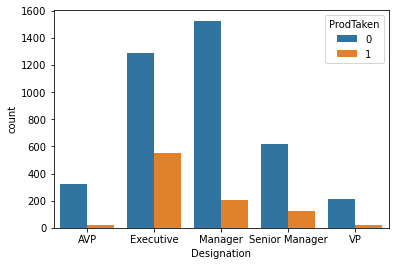

In [57]:
sns.countplot(data=df, x="Designation", hue="ProdTaken")

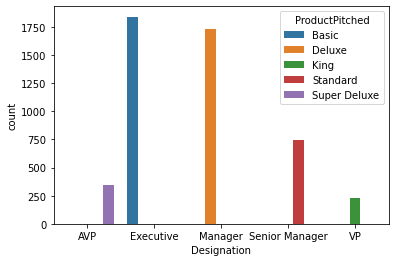

In [58]:
sns.countplot(data=df, x="Designation", hue="ProductPitched")

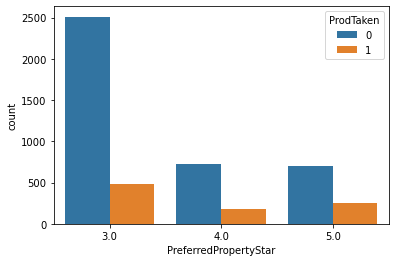

In [59]:
sns.countplot(data=df, x="PreferredPropertyStar", hue="ProdTaken")

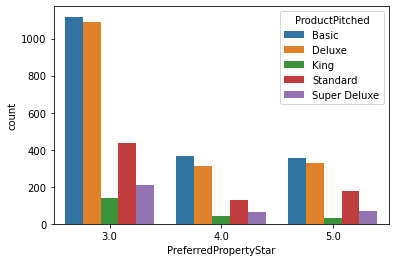

In [60]:
sns.countplot(data=df, x="PreferredPropertyStar", hue="ProductPitched")

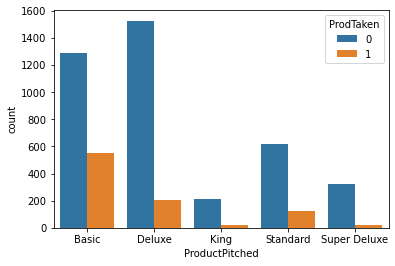

In [61]:
sns.countplot(data=df, x="ProductPitched", hue="ProdTaken")

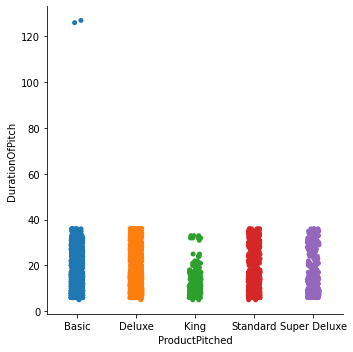

In [62]:
sns.catplot(data=df, x="ProductPitched", y="DurationOfPitch")

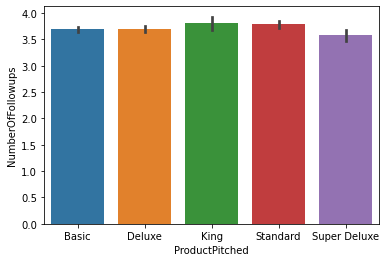

In [63]:
sns.barplot(data=df, x="ProductPitched", y="NumberOfFollowups")

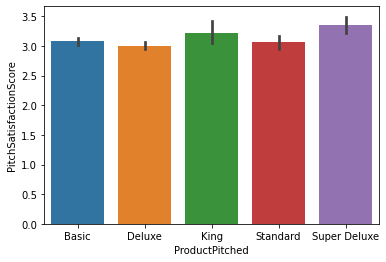

In [64]:
sns.barplot(data=df, x="ProductPitched", y="PitchSatisfactionScore")

#### Observation

1)There is a moderate correlation between NumberOfChildrenVisiting and NumberOfPersonVisiting (r=0.61), and age and MonthlyIncome (r=0.46)
2) Younger and their monthly income is under 30000 most likely buy a product.
3) Visiting with 3 or 4 people most likely buy a product.
4) Lower monthly income customers are more likely to buy a basic package, and high monthly income is more likely to buy a king package.
5) Visiting with 3 people most likely buy a basic or deluxe package.
6) People with three children are more likely to buy a basic or standard package.
7) People with 2 children most likely buy a basic or deluxe package.
8) Male and female mostly similar pattern between their income and purchasing of packages.
9) Unmarried people mostly do not prefer a king package and most likely prefer to have a deluxe package.
10) People who do not have a passport most likely buy a basic or deluxe product.
11) Male and female customers most likely prefer basic or deluxe packages.
12) People who do not have a car most likely do not buy a king package.
13) City tier 1 is most likely to buy a package, but city tier 2 is most likely not to buy a package.
14) Salaried employment most likely buy a basic or deluxe package.
15) The customers who have VP title buy a king, AVP is most likely buy a super deluxe, the executive is basic, manager is deluxe, and senior manager is a standard package.
16) The customers most likely prefer 3-star property with basic or deluxe package.
17) It seems the number of follow up, duration of pitch, and pitch satisfaction scores are not so different based on product type.


### Data Cleanning

In [65]:
df.loc[df.Gender == "Fe Male","Gender"]="Female"

In [66]:
df.Gender.unique()

[Female, Male]
Categories (2, object): [Female, Male]

Drop the customer interaction data because it does not give any information about the customer profile for the new travel package.

In [67]:
df.drop(columns=["DurationOfPitch","NumberOfFollowups","PitchSatisfactionScore","ProductPitched"], inplace=True)

In [68]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,Salaried,Female,3,3.0,Single,1.0,1,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,Salaried,Male,3,4.0,Divorced,2.0,0,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,Free Lancer,Male,3,3.0,Single,7.0,1,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,Salaried,Female,2,3.0,Divorced,2.0,1,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,Small Business,Male,2,4.0,Divorced,1.0,0,1,0.0,Executive,18468.0


### Checking Missing Values

In [69]:
df.isnull().sum().sort_values()

ProdTaken                     0
CityTier                      0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
MaritalStatus                 0
Passport                      0
OwnCar                        0
Designation                   0
TypeofContact                25
PreferredPropertyStar        26
NumberOfChildrenVisiting     66
NumberOfTrips               140
Age                         226
MonthlyIncome               233
dtype: int64

In [70]:
num_missing_val=df.isnull().sum(axis=1)
num_missing_val.value_counts()

0    4327
1     406
2     155
dtype: int64

In [71]:
df[num_missing_val==2].sample(5) # age and monthly income are missing values

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1919,0,NaN,Company Invited,1,Salaried,Female,2,3.0,Married,2.0,0,1,1.0,Executive,NaN
1429,0,NaN,Self Enquiry,1,Salaried,Male,2,3.0,Single,1.0,0,1,0.0,Manager,NaN
2049,0,34.0,NaN,1,Small Business,Female,2,5.0,Single,2.0,0,1,0.0,Executive,NaN
991,0,NaN,Self Enquiry,3,Small Business,Male,2,4.0,Divorced,1.0,1,0,1.0,Manager,NaN
2089,0,NaN,Self Enquiry,3,Small Business,Male,2,5.0,Married,2.0,0,0,1.0,Manager,NaN


In [72]:
df["MonthlyIncome"].fillna(df.MonthlyIncome.median(), inplace=True) 

In [73]:
df[df["PreferredPropertyStar"].isnull()] # there is no trend so drop the missing values on the PreferredPropertyStar column


,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,Salaried,Female,2,NaN,Divorced,1.0,1,1,0.0,Executive,95000.0
2609,0,51.0,Self Enquiry,1,Salaried,Female,3,NaN,Single,5.0,0,1,1.0,VP,38604.0
2634,0,53.0,Self Enquiry,1,Salaried,Male,4,NaN,Divorced,2.0,0,1,2.0,VP,38677.0
3012,1,56.0,Self Enquiry,1,Small Business,Male,4,NaN,Divorced,7.0,1,1,3.0,VP,38537.0
3190,0,42.0,Company Invited,1,Salaried,Female,3,NaN,Married,3.0,0,1,1.0,VP,38651.0
3193,1,53.0,Self Enquiry,3,Small Business,Female,3,NaN,Divorced,3.0,0,1,1.0,VP,38523.0
3214,0,47.0,Self Enquiry,1,Small Business,Male,3,NaN,Married,2.0,0,1,2.0,VP,38305.0
3295,0,57.0,Self Enquiry,1,Large Business,Female,4,NaN,Married,6.0,0,0,3.0,VP,38621.0
3342,0,44.0,Self Enquiry,1,Salaried,Male,4,NaN,Divorced,5.0,0,1,3.0,VP,38418.0
3362,0,52.0,Company Invited,3,Salaried,Male,3,NaN,Married,6.0,1,1,2.0,VP,38525.0


In [74]:
df=df.dropna(subset=["PreferredPropertyStar"])

In [75]:
df.isnull().sum().sort_values()

ProdTaken                     0
CityTier                      0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
PreferredPropertyStar         0
MaritalStatus                 0
Passport                      0
OwnCar                        0
Designation                   0
MonthlyIncome                 0
TypeofContact                25
NumberOfChildrenVisiting     66
NumberOfTrips               140
Age                         226
dtype: int64

In [76]:
df["Age"].fillna(df.Age.median(), inplace=True) 

C:\Users\kayaf\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [77]:
df["NumberOfChildrenVisiting"].fillna(df.NumberOfChildrenVisiting.median(), inplace=True) 

In [78]:
df["NumberOfTrips"].fillna(df.NumberOfTrips.median(), inplace=True) 

In [79]:
df.isnull().sum() 

ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [80]:
df[df["TypeofContact"].isnull()] 

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
224,0,31.0,NaN,1,Small Business,Male,2,3.0,Divorced,1.0,0,1,0.0,Manager,22347.0
571,0,26.0,NaN,1,Salaried,Female,3,3.0,Married,4.0,0,1,2.0,Executive,22347.0
572,0,29.0,NaN,1,Small Business,Female,3,3.0,Divorced,5.0,0,1,0.0,Manager,22347.0
576,0,27.0,NaN,3,Small Business,Male,2,3.0,Divorced,1.0,0,0,1.0,Manager,22347.0
579,0,34.0,NaN,1,Small Business,Female,2,5.0,Single,2.0,0,1,1.0,Executive,22347.0
598,1,28.0,NaN,1,Small Business,Male,2,3.0,Single,7.0,0,0,0.0,Executive,22347.0
622,0,32.0,NaN,3,Salaried,Male,3,3.0,Married,3.0,0,0,0.0,Manager,22347.0
724,0,24.0,NaN,1,Small Business,Female,2,3.0,Married,2.0,0,1,1.0,Manager,22347.0
843,0,26.0,NaN,1,Small Business,Male,2,3.0,Divorced,2.0,0,1,1.0,Executive,22347.0
1021,1,25.0,NaN,3,Salaried,Male,3,5.0,Divorced,4.0,0,1,0.0,Executive,22347.0


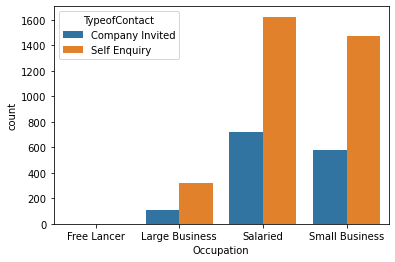

In [81]:
sns.countplot(data=df, x="Occupation", hue="TypeofContact") # check small business type of contact

In [82]:
df["TypeofContact"].value_counts() # use mode to fill the missing values 

Self Enquiry       3422
Company Invited    1415
Name: TypeofContact, dtype: int64

In [83]:
df['TypeofContact'] = df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])

<ipython-input-83-17f32201ff20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TypeofContact'] = df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])


In [84]:
df["TypeofContact"].isnull().sum()

0

### Data Cleanning

### Outliers

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4862 entries, 0 to 4887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4862 non-null   category
 1   Age                       4862 non-null   float64 
 2   TypeofContact             4862 non-null   category
 3   CityTier                  4862 non-null   category
 4   Occupation                4862 non-null   category
 5   Gender                    4862 non-null   category
 6   NumberOfPersonVisiting    4862 non-null   int64   
 7   PreferredPropertyStar     4862 non-null   category
 8   MaritalStatus             4862 non-null   category
 9   NumberOfTrips             4862 non-null   float64 
 10  Passport                  4862 non-null   category
 11  OwnCar                    4862 non-null   category
 12  NumberOfChildrenVisiting  4862 non-null   float64 
 13  Designation               4862 non-null   catego

In [86]:
quartiles = np.quantile(df['MonthlyIncome'][df['MonthlyIncome'].notnull()], [.25, .75])
MonthlyIncome_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_MonthlyIncome = df.loc[np.abs(df['MonthlyIncome'] - df['MonthlyIncome'].median()) > MonthlyIncome_4iqr, 'MonthlyIncome']
outliers_MonthlyIncome #there are outliers, drop the outliers

142      1000.0
2482    98678.0
Name: MonthlyIncome, dtype: float64

In [87]:
df.drop(outliers_MonthlyIncome.index, axis=0, inplace=True)

C:\Users\kayaf\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [88]:
quartiles1 = np.quantile(df['NumberOfTrips'][df['NumberOfTrips'].notnull()], [.25, .75])
NumberOfTrips_4iqr = 4 * (quartiles1[1] - quartiles1[0])
outliers_NumberOfTrips = df.loc[np.abs(df['NumberOfTrips'] - df['NumberOfTrips'].median()) > NumberOfTrips_4iqr, 'NumberOfTrips']
outliers_NumberOfTrips #there are outliers, fiil them with median score of the column

385     19.0
816     21.0
2829    20.0
3260    22.0
Name: NumberOfTrips, dtype: float64

In [89]:
df.loc[np.abs(df['NumberOfTrips'] - df['NumberOfTrips'].median()) > NumberOfTrips_4iqr, 'NumberOfTrips'] = np.nan 

C:\Users\kayaf\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [90]:
df["NumberOfTrips"].isnull().sum()

4

In [91]:
df["NumberOfTrips"].fillna(df.NumberOfTrips.median(), inplace=True)

C:\Users\kayaf\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [92]:
quartiles2 = np.quantile(df['NumberOfPersonVisiting'][df['NumberOfPersonVisiting'].notnull()], [.25, .75])
NumberOfPersonVisiting_4iqr = 4 * (quartiles2[1] - quartiles2[0])
outliers_NumberOfPersonVisiting = df.loc[np.abs(df['NumberOfPersonVisiting'] - df['NumberOfPersonVisiting'].median()) > NumberOfPersonVisiting_4iqr, 'NumberOfPersonVisiting']
outliers_NumberOfPersonVisiting #there are no outliers

Series([], Name: NumberOfPersonVisiting, dtype: int64)

In [93]:
quartiles3 = np.quantile(df['NumberOfChildrenVisiting'][df['NumberOfChildrenVisiting'].notnull()], [.25, .75])
NumberOfChildrenVisiting_4iqr = 4 * (quartiles3[1] - quartiles3[0])
outliers_NumberOfChildrenVisiting= df.loc[np.abs(df['NumberOfChildrenVisiting'] - df['NumberOfChildrenVisiting'].median()) > NumberOfChildrenVisiting_4iqr, 'NumberOfChildrenVisiting']
outliers_NumberOfChildrenVisiting #there are no outliers

Series([], Name: NumberOfChildrenVisiting, dtype: float64)

In [94]:
quartiles4 = np.quantile(df['Age'][df['Age'].notnull()], [.25, .75])
Age_4iqr = 4 * (quartiles4[1] - quartiles4[0])
outliers_Age= df.loc[np.abs(df['Age'] - df['Age'].median()) > Age_4iqr, 'Age']
outliers_Age #there are no outliers

Series([], Name: Age, dtype: float64)

In [95]:
df.dtypes

ProdTaken                   category
Age                          float64
TypeofContact               category
CityTier                    category
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
PreferredPropertyStar       category
MaritalStatus               category
NumberOfTrips                float64
Passport                    category
OwnCar                      category
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

In [96]:
dummy_df = pd.get_dummies(df, columns=["CityTier","TypeofContact", "Occupation","Gender","MaritalStatus","Designation","PreferredPropertyStar","OwnCar","Passport"], drop_first=True) #  get dummy for the categorical variables 
dummy_df.head()

,ProdTaken,Age,NumberOfPersonVisiting,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome,CityTier_2,CityTier_3,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0,OwnCar_1,Passport_1
0,1,41.0,3,1.0,0.0,20993.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1
1,0,49.0,3,2.0,2.0,20130.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0
2,1,37.0,3,7.0,0.0,17090.0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
3,0,33.0,2,2.0,1.0,17909.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1
4,0,36.0,2,1.0,0.0,18468.0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0


In [97]:
X = dummy_df.drop(["ProdTaken"], axis=1)
y = dummy_df["ProdTaken"]

In [98]:
X.head()

,Age,NumberOfPersonVisiting,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome,CityTier_2,CityTier_3,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0,OwnCar_1,Passport_1
0,41.0,3,1.0,0.0,20993.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1
1,49.0,3,2.0,2.0,20130.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0
2,37.0,3,7.0,0.0,17090.0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
3,33.0,2,2.0,1.0,17909.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1
4,36.0,2,1.0,0.0,18468.0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [100]:
X_train.shape

(3402, 24)

In [101]:
X_test.shape

(1458, 24)

In [102]:
y_train.value_counts(1)

0    0.809524
1    0.190476
Name: ProdTaken, dtype: float64

In [103]:
y_test.value_counts(1)

0    0.817558
1    0.182442
Name: ProdTaken, dtype: float64

In [104]:
def classification_model_performance(model, predictors, target):
    prediction = model.predict(predictors)

    accuracy = accuracy_score(target, prediction) 
    recall = recall_score(target, prediction) 
    precision = precision_score(target, prediction)
    f1 = f1_score(target, prediction) 

    # creating a dataframe of metrics
    df_performance = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_performance

In [105]:
def confusion_matrix_classification(model, predictors, target):
    y_prediction = model.predict(predictors)
    cm = confusion_matrix(target, y_prediction)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True")
    plt.xlabel("Predicted")

#### Decision Tree

In [106]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [107]:
dtree_model_train_performance= classification_model_performance(dtree, X_train, y_train) 
print ("Decision tree trainning performance \n", dtree_model_train_performance)

Decision tree trainning performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [108]:
dtree_model_test_performance= classification_model_performance(dtree, X_test, y_test) # the model is overfitting.
print ("Decision tree test performance \n", dtree_model_test_performance)

Decision tree test performance 
    Accuracy    Recall  Precision       F1
0  0.868999  0.657895   0.636364  0.64695


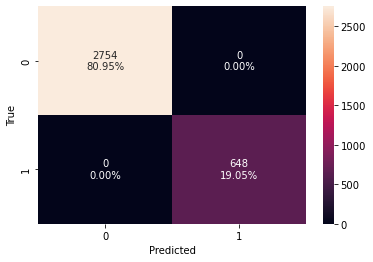

In [109]:
confusion_matrix_classification(dtree, X_train, y_train) # there is no false negative and false positive for training data

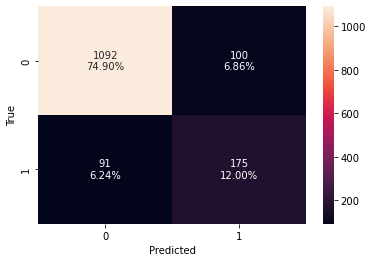

In [110]:
confusion_matrix_classification(dtree, X_test, y_test) #6.24% false negatives that impact the recall score

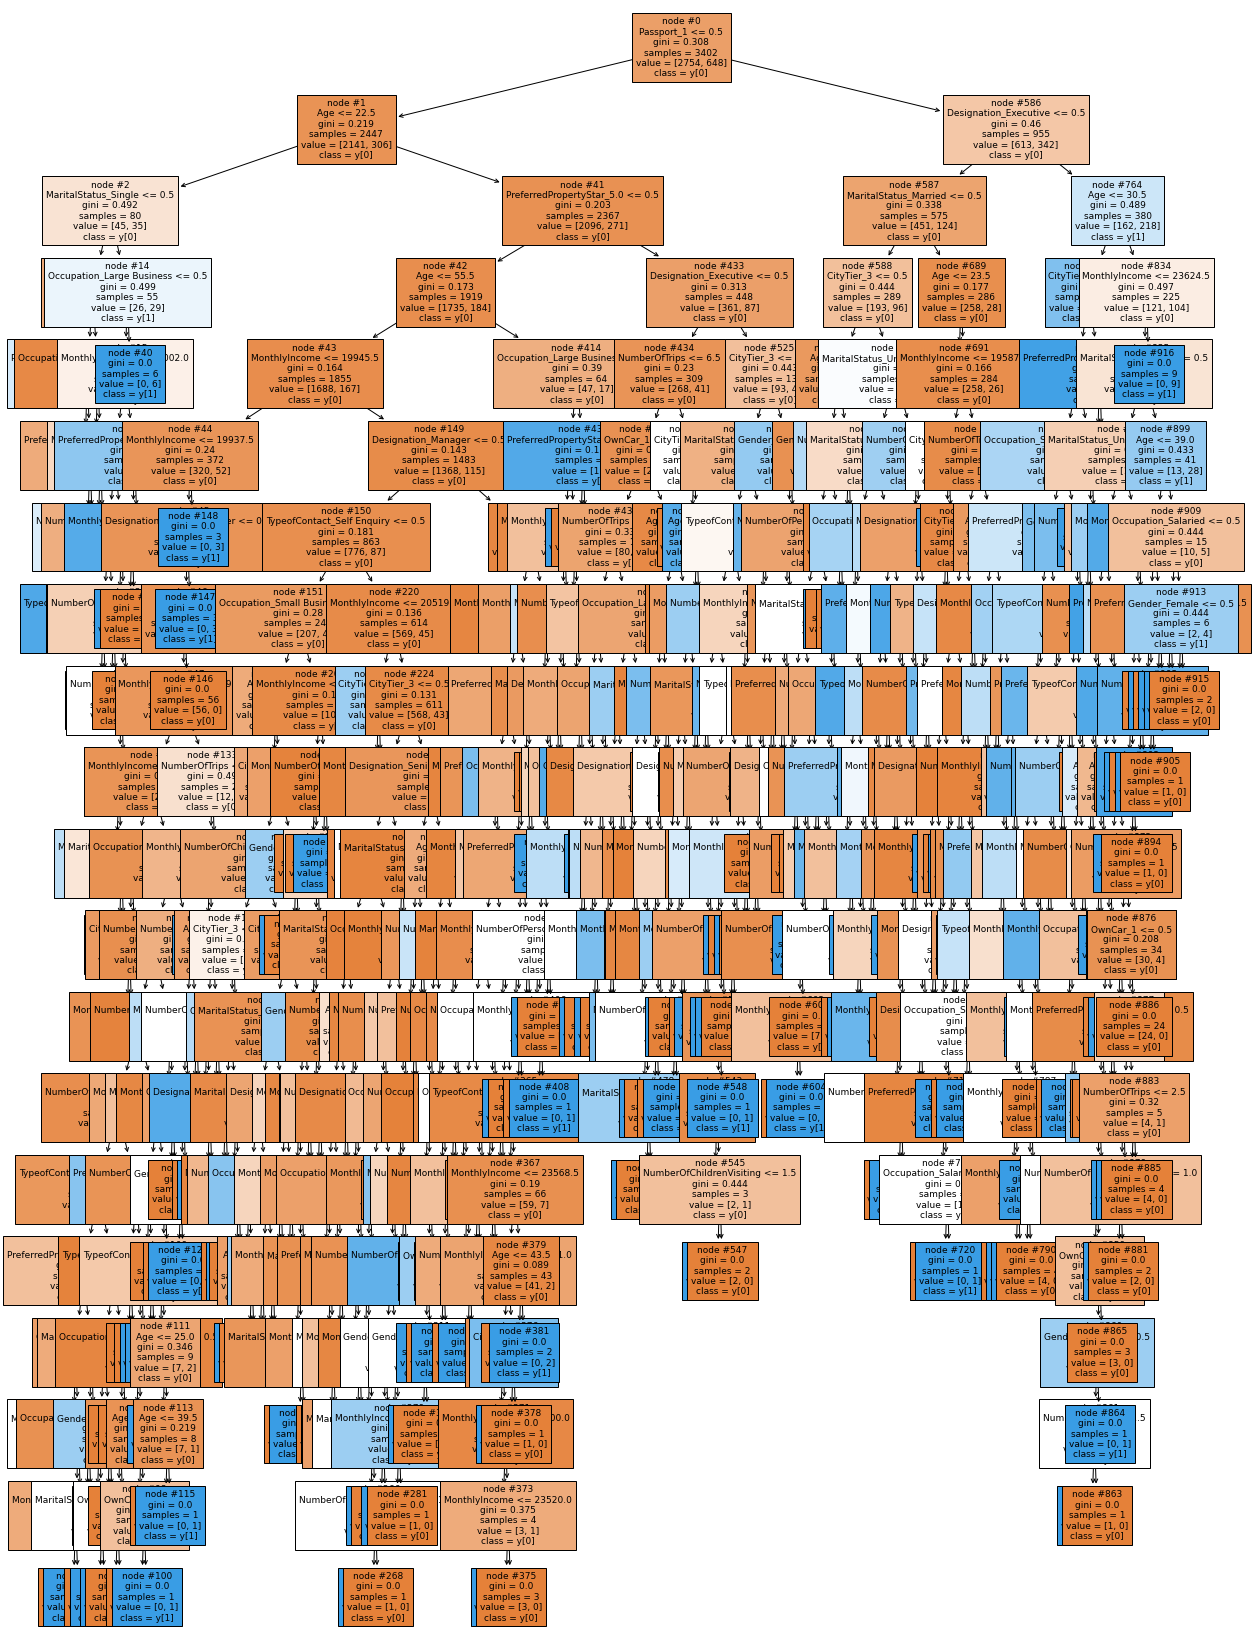

In [111]:
plt.figure(figsize=(20, 30))
feature_names = X_train.columns  

tree.plot_tree(
    dtree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [112]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                            Importance
MonthlyIncome                 0.185573
Age                           0.172956
NumberOfTrips                 0.078197
Passport_1                    0.071129
Designation_Executive         0.066037
CityTier_3                    0.059958
NumberOfPersonVisiting        0.036227
MaritalStatus_Single          0.032105
PreferredPropertyStar_4.0     0.029733
TypeofContact_Self Enquiry    0.029135
NumberOfChildrenVisiting      0.026081
Gender_Female                 0.025154
Occupation_Large Business     0.023680
MaritalStatus_Unmarried       0.020288
MaritalStatus_Married         0.020219
OwnCar_1                      0.019563
Occupation_Salaried           0.017651
PreferredPropertyStar_5.0     0.017487
CityTier_2                    0.016727
Occupation_Small Business     0.016148
Designation_Senior Manager    0.015815
Gender_Male                   0.008519
Designation_Manager           0.006386
Designation_VP                0.005233


In [113]:
feature_names = list(X.columns)

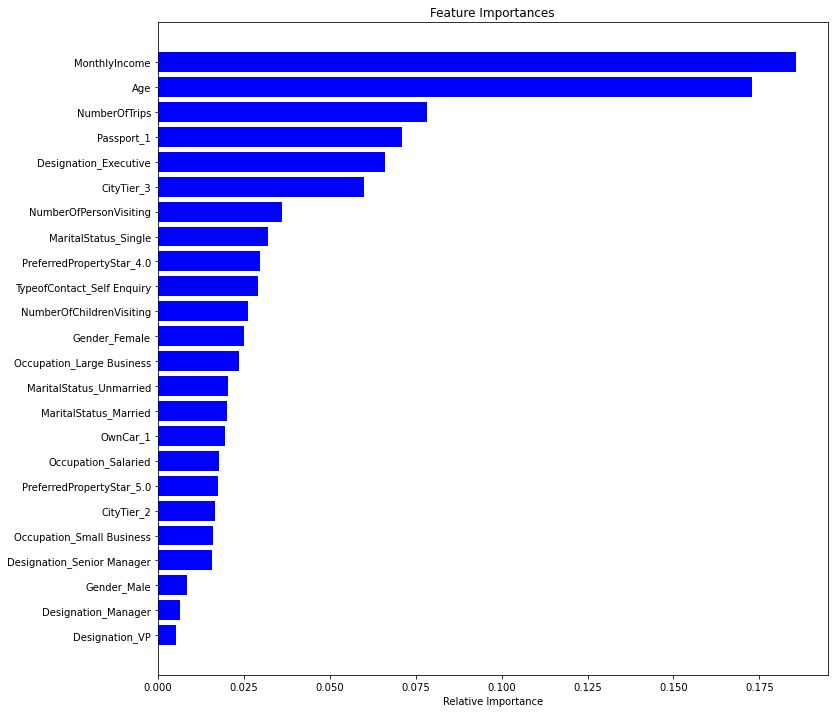

In [114]:
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() #monthly income, age, and number of trips are the three most important features

#### Random Forest Model

In [115]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

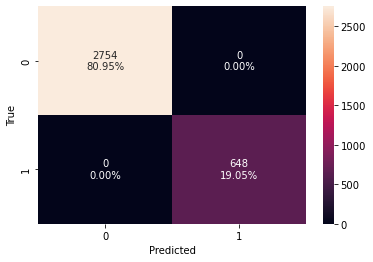

In [116]:
confusion_matrix_classification(rf, X_train, y_train)

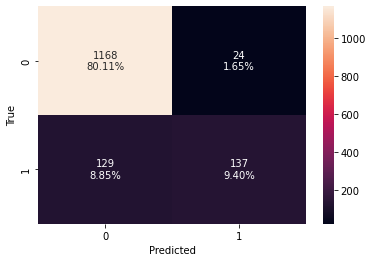

In [117]:
confusion_matrix_classification(rf, X_test, y_test)

In [118]:
Random_forest_model_train_performance = classification_model_performance(rf, X_train,y_train) #model is overfiting
print("Training performance \n",Random_forest_model_train_performance)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [119]:
Random_forest_model_test_performance = classification_model_performance(rf, X_test,y_test) 
print("Test performance \n",Random_forest_model_test_performance)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.895062  0.515038   0.850932  0.641686


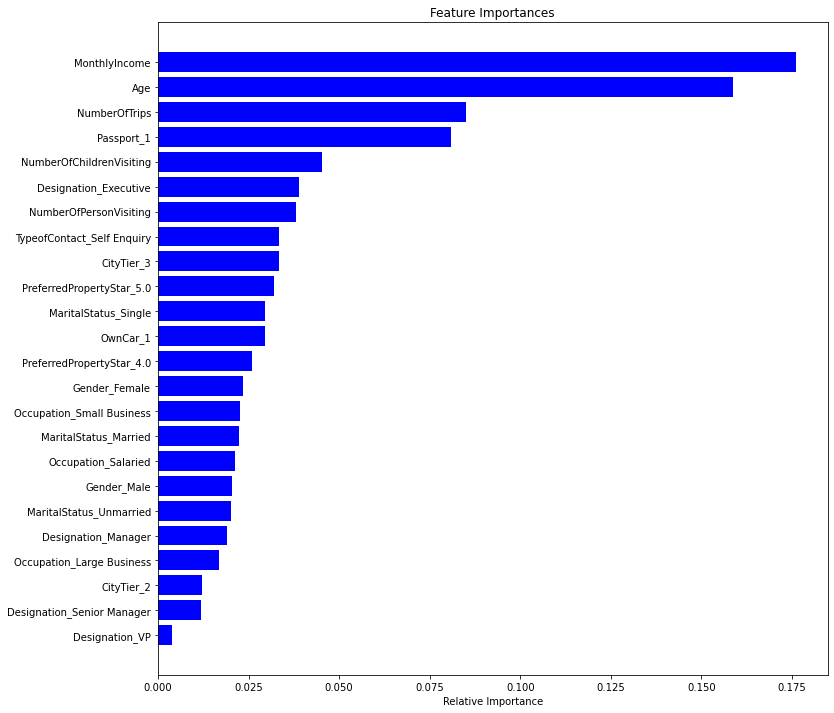

In [120]:
feature_names = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() ##monthly income, age, and number of trips are the three most important features

In [121]:
print(pd.DataFrame(rf.feature_importances_, columns = ["Importances"], index = X_train.columns).sort_values(by = 'Importances', ascending = False))

                            Importances
MonthlyIncome                  0.175998
Age                            0.158724
NumberOfTrips                  0.084881
Passport_1                     0.080745
NumberOfChildrenVisiting       0.045317
Designation_Executive          0.038807
NumberOfPersonVisiting         0.038205
TypeofContact_Self Enquiry     0.033326
CityTier_3                     0.033280
PreferredPropertyStar_5.0      0.031950
MaritalStatus_Single           0.029640
OwnCar_1                       0.029449
PreferredPropertyStar_4.0      0.025979
Gender_Female                  0.023373
Occupation_Small Business      0.022588
MaritalStatus_Married          0.022481
Occupation_Salaried            0.021156
Gender_Male                    0.020334
MaritalStatus_Unmarried        0.020195
Designation_Manager            0.019090
Occupation_Large Business      0.016739
CityTier_2                     0.012104
Designation_Senior Manager     0.011893
Designation_VP                 0.003746


#### Bagging Classifier

In [122]:
bagging= BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

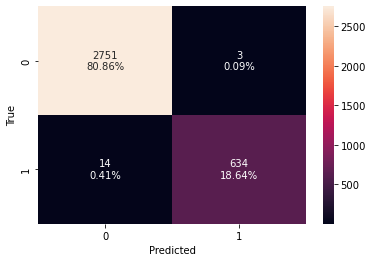

In [123]:
confusion_matrix_classification(bagging, X_train, y_train)

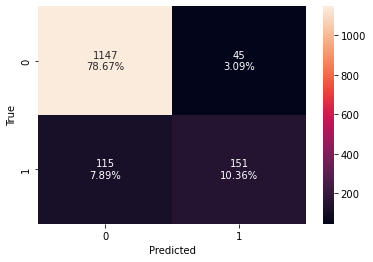

In [124]:
confusion_matrix_classification(bagging, X_test, y_test)

In [125]:
Bagging_classifier_model_train_performance = classification_model_performance(bagging, X_train,y_train) 
print("Training performance \n",Bagging_classifier_model_train_performance) #the model is overfitting

Training performance 
    Accuracy    Recall  Precision       F1
0  0.995003  0.978395    0.99529  0.98677


In [126]:
Bagging_classifier_model_test_performance = classification_model_performance(bagging, X_test,y_test) 
print("Test performance \n",Bagging_classifier_model_test_performance)

Test performance 
    Accuracy    Recall  Precision       F1
0  0.890261  0.567669   0.770408  0.65368


# Observation

1) Monthly income, age, and number of trips are the three most important features on decision tree and random forest models.
2) Decision tree, random forest, and bagging classifier models are overfitting, with good recall scores on the training set but low scores on the test set. The models should be improved. 
3) Recall scores will be used to measure the performance of the model because the company needs a model that detects customes who have good chances to be a buyer so the model need to detect buyers and avoid the false negatives.

# Hyperparameter Tuning

### Decision Tree Hyperparameter Tuning

In [127]:
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.80,1:0.20}, random_state=1)

parameters = {'max_depth': np.arange(2,25), 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, max_depth=21,
                       random_state=1)

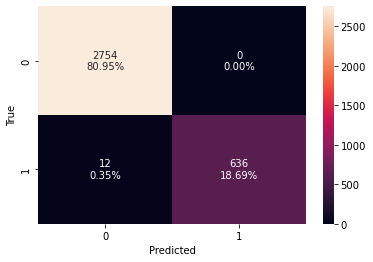

In [128]:
confusion_matrix_classification(dtree_tuned, X_train, y_train)

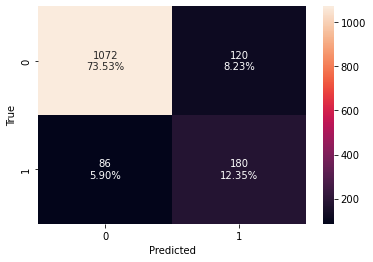

In [129]:
confusion_matrix_classification(dtree_tuned, X_test, y_test)

In [130]:
dtree_tuned_model_train_performance = classification_model_performance(dtree_tuned, X_train,y_train) #model is overfiting
print("Training performance \n",dtree_tuned_model_train_performance)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.996473  0.981481        1.0  0.990654


In [131]:
dtree_tuned_model_test_performance = classification_model_performance(dtree_tuned, X_test,y_test)
print("Test performance \n",dtree_tuned_model_test_performance)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.858711  0.676692        0.6  0.636042


In [132]:
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
MonthlyIncome               0.200390
Age                         0.198620
NumberOfTrips               0.089605
NumberOfPersonVisiting      0.053895
Designation_Executive       0.040434
CityTier_3                  0.035495
PreferredPropertyStar_5.0   0.034392
MaritalStatus_Single        0.033744
Gender_Male                 0.029135
Gender_Female               0.028563
TypeofContact_Self Enquiry  0.028041
Passport_1                  0.027307
NumberOfChildrenVisiting    0.026974
MaritalStatus_Unmarried     0.026136
Occupation_Large Business   0.024178
PreferredPropertyStar_4.0   0.022746
Occupation_Salaried         0.020850
MaritalStatus_Married       0.019884
Occupation_Small Business   0.016526
CityTier_2                  0.013702
Designation_Senior Manager  0.012615
OwnCar_1                    0.010916
Designation_Manager         0.005850
Designation_VP              0.000000


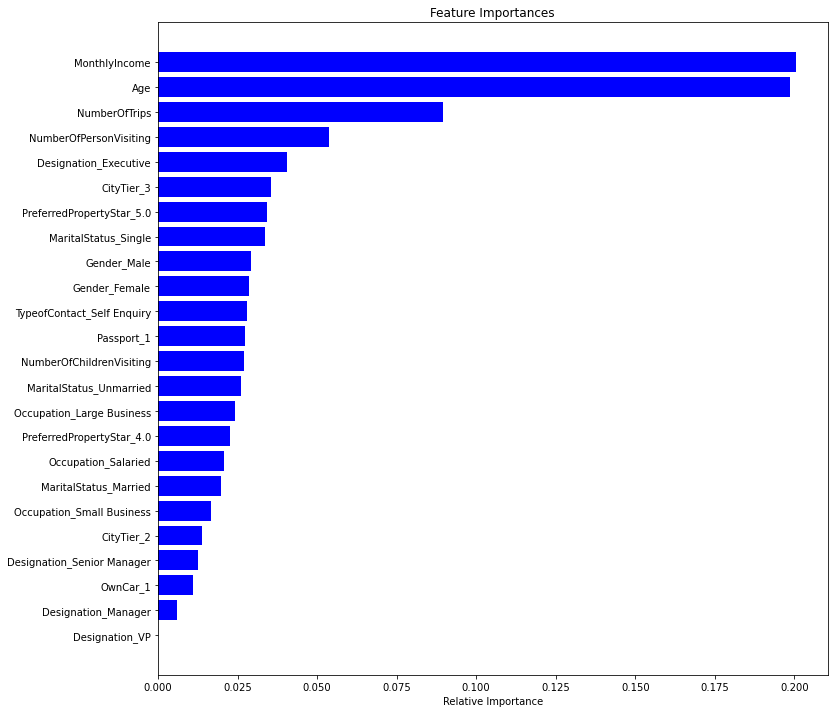

In [133]:
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Random Forest Model Hyperparameter Tuning

In [134]:
rf_tuned = RandomForestClassifier(class_weight= "balanced" ,random_state=1)

parameters = {  
                'max_depth':[2,15,2],
                'max_features': [0.7,0.8,0.9,1],
                'n_estimators': [50,100,150,200]}

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)


rf_tuned = grid_obj.best_estimator_
rf_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=1,
                       n_estimators=200, random_state=1)

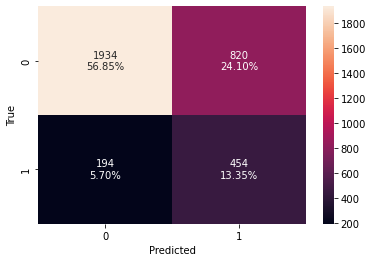

In [135]:
confusion_matrix_classification(rf_tuned, X_train, y_train)

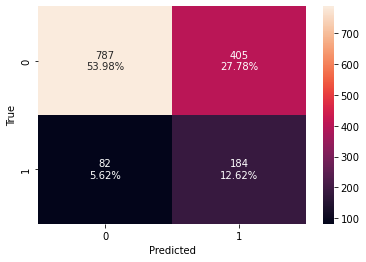

In [136]:
confusion_matrix_classification(rf_tuned, X_test, y_test)

In [137]:
Random_forest_tuned_model_train_performance = classification_model_performance(rf_tuned, X_train,y_train) 
print("Training performance \n",Random_forest_tuned_model_train_performance) # model is not overfitting but the recall scores on the train and test sets are not good

Training performance 
    Accuracy    Recall  Precision        F1
0   0.70194  0.700617   0.356358  0.472425


In [138]:
Random_forest_tuned_model_test_performance = classification_model_performance(rf_tuned, X_test,y_test) 
print("Test performance \n",Random_forest_tuned_model_test_performance)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.665981  0.691729   0.312394  0.430409


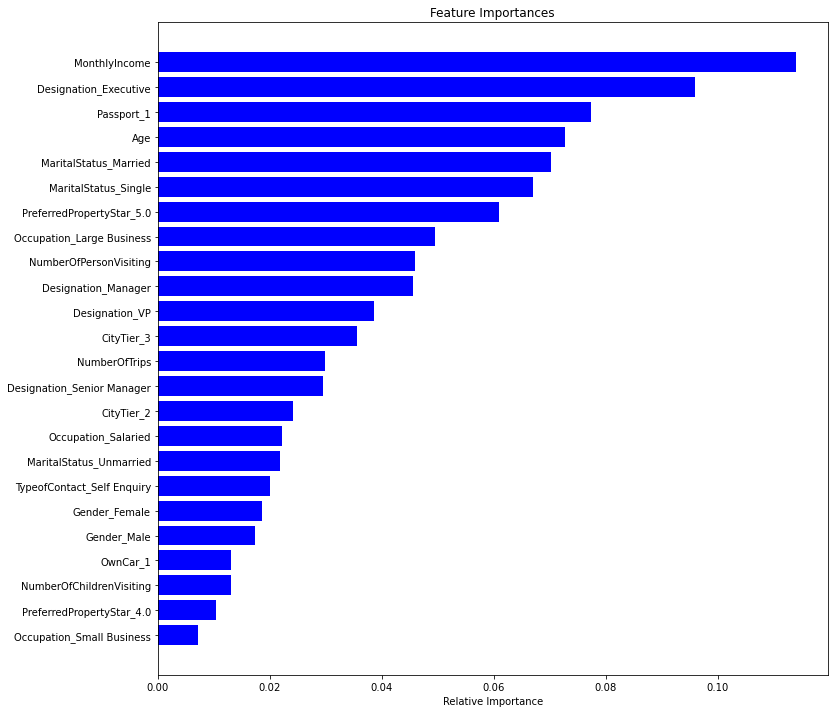

In [139]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance') 
plt.show()

### Bagging Classifier Hyperparameter Tuning

In [140]:
bagging_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [50,100,150,200],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_tuned = grid_obj.best_estimator_

bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=200,
                  random_state=1)

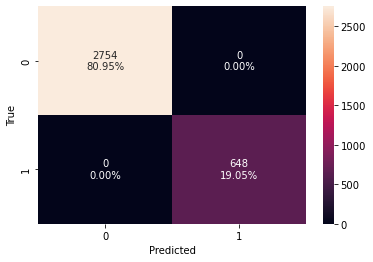

In [141]:
confusion_matrix_classification(bagging_tuned, X_train, y_train)

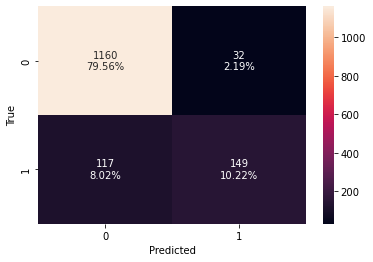

In [142]:
confusion_matrix_classification(bagging_tuned, X_test, y_test)

In [143]:
bagging_tuned_model_train_performance = classification_model_performance(bagging_tuned, X_train,y_train) 
print("Training performance \n",bagging_tuned_model_train_performance)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [144]:
bagging_tuned_model_test_performance = classification_model_performance(bagging_tuned, X_test,y_test) 
print("Test performance \n",bagging_tuned_model_test_performance)

Test performance 
    Accuracy   Recall  Precision        F1
0  0.897805  0.56015   0.823204  0.666667


In [145]:
bagging_tuned2 = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [50,100,150,200],
              'base_estimator':[LogisticRegression(solver='liblinear',random_state=1,max_iter=1000)]
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_tuned2, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_tuned2 = grid_obj.best_estimator_

bagging_tuned2.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  max_features=0.7, max_samples=1, n_estimators=50,
                  random_state=1)

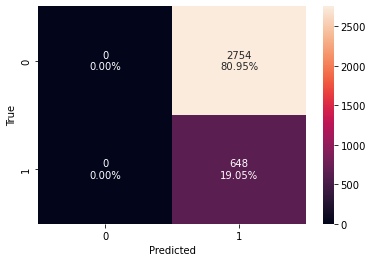

In [146]:
confusion_matrix_classification(bagging_tuned2, X_train, y_train)

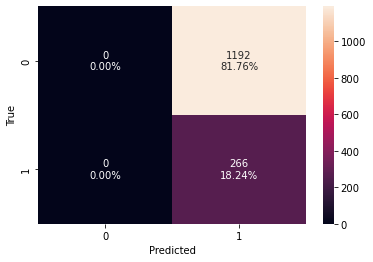

In [147]:
confusion_matrix_classification(bagging_tuned2, X_test, y_test)

In [148]:
bagging2_tuned_model_train_performance = classification_model_performance(bagging_tuned2, X_train,y_train) 
print("Training performance \n",bagging2_tuned_model_train_performance) # the model has a good recall score and it is not overfitting.

Training performance 
    Accuracy  Recall  Precision    F1
0  0.190476     1.0   0.190476  0.32


In [149]:
bagging2_tuned_model_test_performance = classification_model_performance(bagging_tuned2, X_test,y_test) 
print("Test performance \n",bagging2_tuned_model_test_performance)

Test performance 
    Accuracy  Recall  Precision        F1
0  0.182442     1.0   0.182442  0.308585


#### Observations

1) Tuned and untuned decision tree models are overfitting and not a good model. Monthy income, age and number of trips are the three most important features of the tuned decision tree model.
2) Tuned random forest model is not overfitting,it can be used for predicting future customers. Monthly income, designation_executive and passport are the three most important features of the tuned random forest model.
3)Tuned bagging classifier model with the decision tree estimator is also overfitting, and the recall score is high on training data but very low on the test set. However, the tuned bagging classifier with logistic regression estimator has a high recall score on training and test sets(recall=1) and is not overfitting. Accuracy scores and precision scores are very low on training and test sets.Not a good model to detect buyers and not buyers (recall is very high, but precision is very low, the model predict every customer as a buyer, very high false positive)
4) The tuned decision tree and bagging with decision tree estimator are overfitting; not good to select them as a model to predict future customers. 

# Boosting

#### AdaBoost Classifier

In [150]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

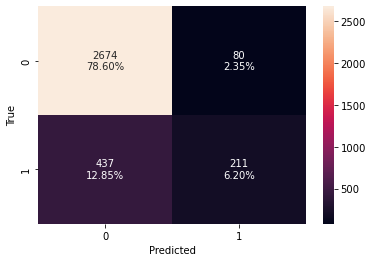

In [151]:
confusion_matrix_classification(ada, X_train, y_train)

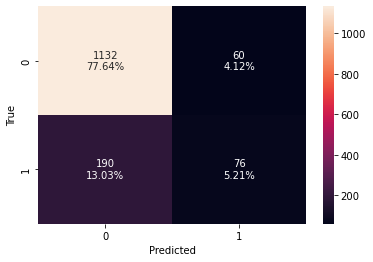

In [152]:
confusion_matrix_classification(ada, X_test, y_test)

In [153]:
ada_model_train_performance = classification_model_performance(ada, X_train,y_train) 
print("Training performance \n",ada_model_train_performance)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.848031  0.325617   0.725086  0.449414


In [154]:
ada_model_test_performance = classification_model_performance(ada, X_test,y_test) 
print("Test performance \n",ada_model_test_performance)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.828532  0.285714   0.558824  0.378109


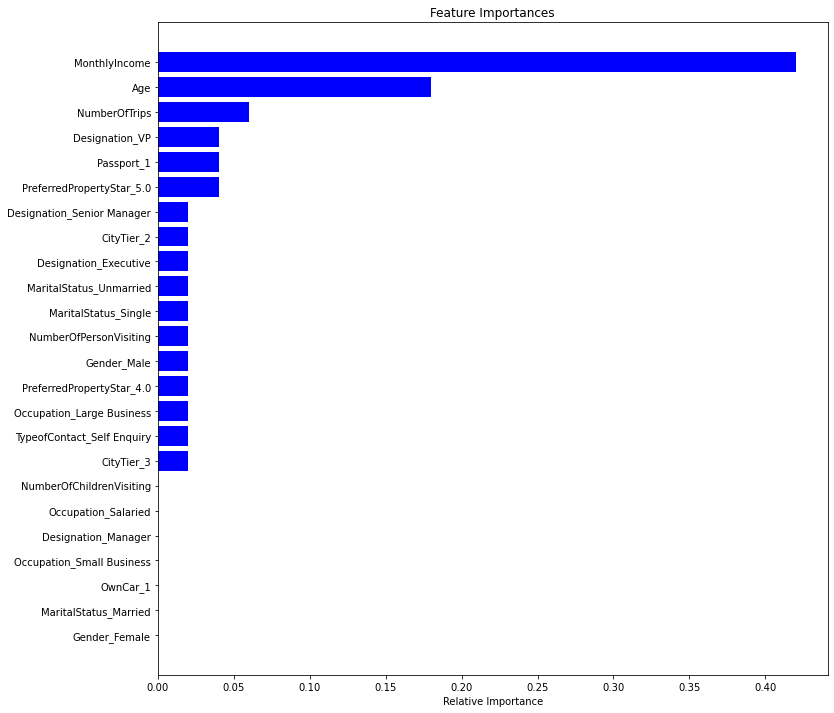

In [155]:
importances = ada.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Gradient Boosting Classifier

In [156]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

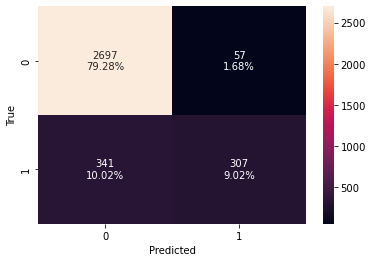

In [157]:
confusion_matrix_classification(gbc, X_train, y_train)

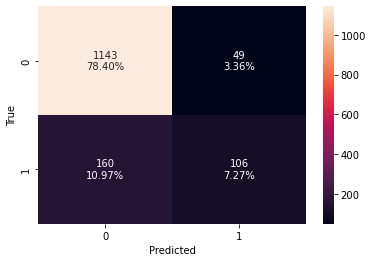

In [158]:
confusion_matrix_classification(gbc, X_test, y_test)

In [159]:
Gradient_model_train_performance = classification_model_performance(gbc, X_train,y_train) 
print("Training performance \n",Gradient_model_train_performance )

Training performance 
    Accuracy    Recall  Precision        F1
0   0.88301  0.473765   0.843407  0.606719


In [160]:
Gradient_model_test_performance = classification_model_performance(gbc, X_test,y_test) 
print("Test performance \n",Gradient_model_test_performance )

Test performance 
    Accuracy    Recall  Precision        F1
0  0.856653  0.398496   0.683871  0.503563


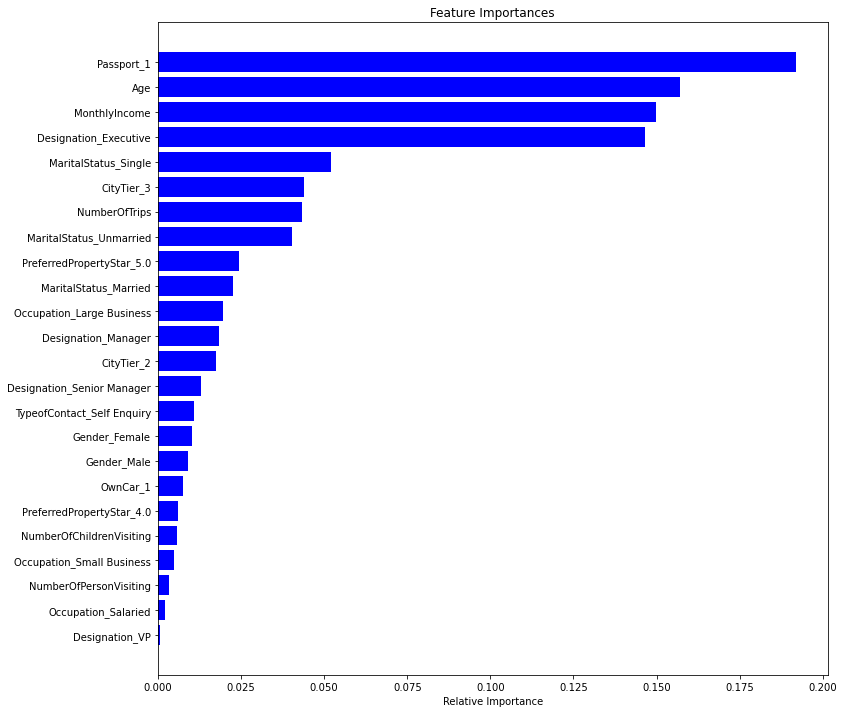

In [161]:
importances = gbc.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### XGBoost Classifier

In [162]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train,y_train)

C:\Users\kayaf\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

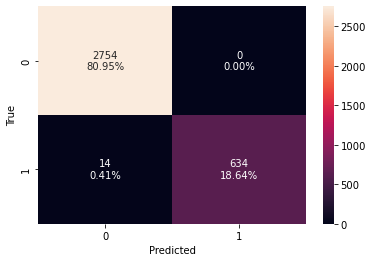

In [164]:
confusion_matrix_classification(xgb, X_train, y_train)

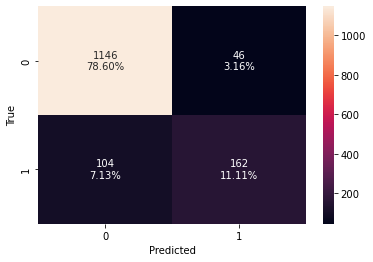

In [165]:
confusion_matrix_classification(xgb, X_test, y_test)

In [166]:
XGBoost_model_train_performance = classification_model_performance(xgb, X_train,y_train) 
print("Training performance \n",XGBoost_model_train_performance )

Training performance 
    Accuracy    Recall  Precision       F1
0  0.995885  0.978395        1.0  0.98908


In [167]:
XGBoost_model_test_performance = classification_model_performance(xgb, X_test,y_test) 
print("Test performance \n",XGBoost_model_test_performance )

Test performance 
    Accuracy    Recall  Precision        F1
0  0.897119  0.609023   0.778846  0.683544


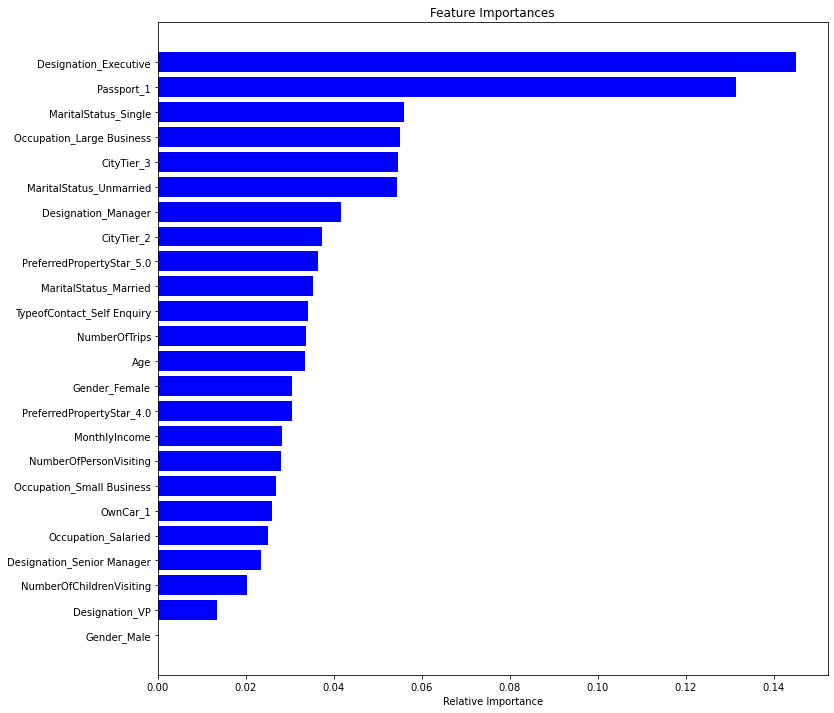

In [168]:
importances = xgb.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Observations

1) Ada and Gradient boosting have low recall and accuracy scores, so they are not a good model to predict future customers.
2) Monthly income, age, and number of trips are the three most important future on the AdaBoost model.
3) Passport, age and monthly income are the three most important features of the gradient boost model.
4) XGBoost model is overfitting, designation_executive, passport, and marital status_single are the most important features of the XGBoost model.
5) Overall, the untuned boosting models are not good to predict future customers.


### Hyperparameter Tuning- Boosting

##### AdaBoost Classifier Hyperparameter Tuning

In [169]:
ada_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1),DecisionTreeClassifier(max_depth=4, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

acc_scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = GridSearchCV(ada_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


ada_tuned = grid_obj.best_estimator_


ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         random_state=1),
                   learning_rate=0.9, n_estimators=60, random_state=1)

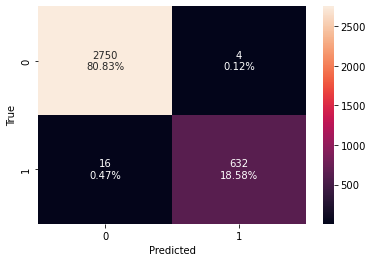

In [170]:
confusion_matrix_classification(ada_tuned, X_train, y_train)

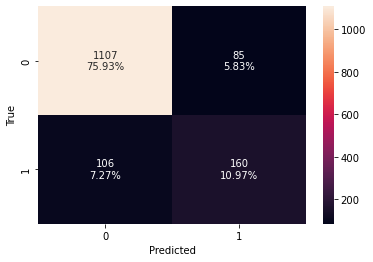

In [171]:
confusion_matrix_classification(ada_tuned, X_test, y_test)

In [172]:
ada_tuned_model_train_performance = classification_model_performance(ada_tuned, X_train,y_train) 
print("Training performance \n",ada_tuned_model_train_performance)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.994121  0.975309   0.993711  0.984424


In [173]:
ada_model_tuned_test_performance = classification_model_performance(ada_tuned, X_test,y_test) 
print("Test performance \n",ada_model_tuned_test_performance)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.868999  0.601504   0.653061  0.626223


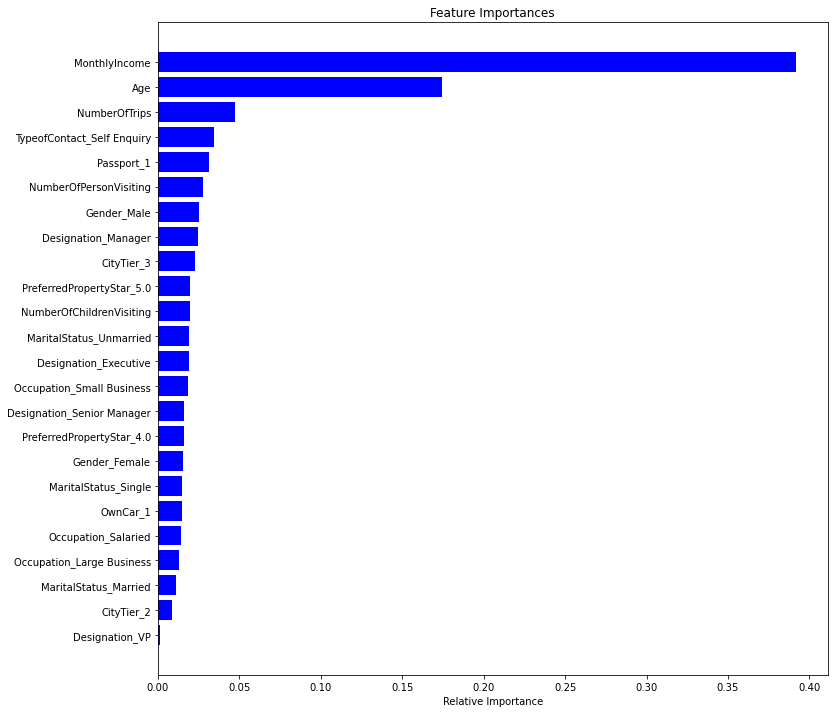

In [174]:
importances = ada_tuned.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Gradient Boosting Classifier Hyperparameter Tuning

In [175]:
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [50,100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

gbc_tuned = grid_obj.best_estimator_
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

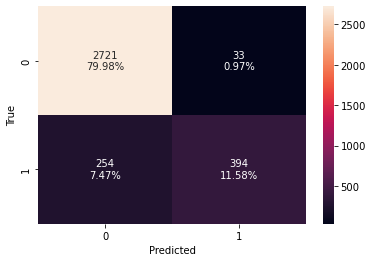

In [176]:
confusion_matrix_classification(gbc_tuned, X_train, y_train)

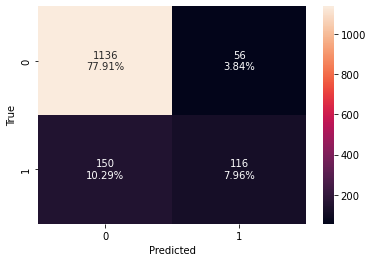

In [177]:
confusion_matrix_classification(gbc_tuned, X_test, y_test)

In [178]:
gbc_tuned_model_train_performance = classification_model_performance(gbc_tuned, X_train,y_train) 
print("Training performance \n",gbc_tuned_model_train_performance)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.915638  0.608025   0.922717  0.733023


In [179]:
gbc_model_tuned_test_performance = classification_model_performance(gbc_tuned, X_test,y_test) 
print("Test performance \n",gbc_model_tuned_test_performance)

Test performance 
    Accuracy   Recall  Precision       F1
0  0.858711  0.43609   0.674419  0.52968


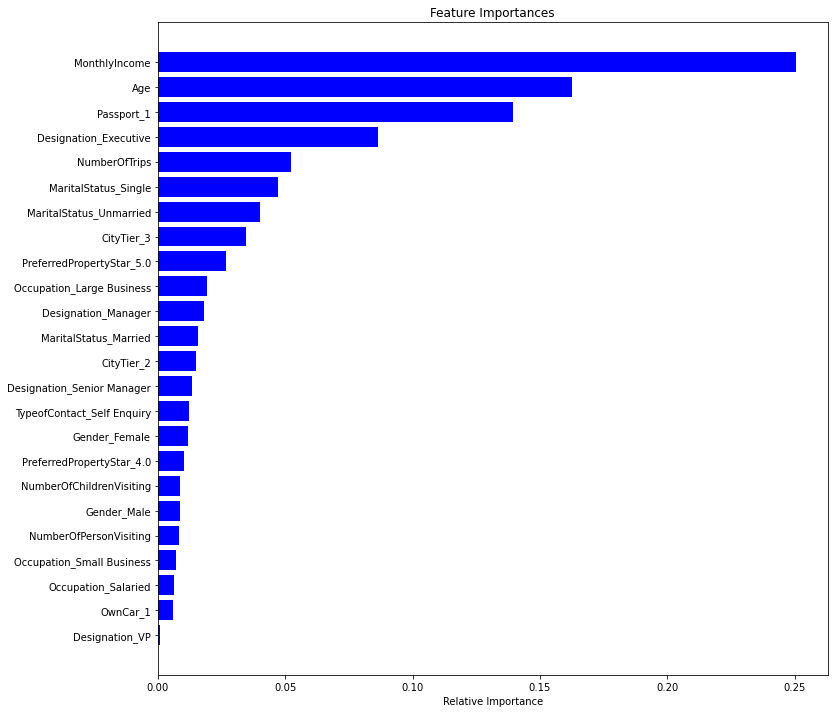

In [180]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Stacking Classifier

In [181]:
estimators = [('Random Forest',rf), ('Gradient Boosting',gbc), ('Decision Tree',dtree)]

final_estimator = xgb

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

C:\Users\kayaf\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=0.5,
                                                 booster='gbtree',
                                                 colsample_bylevel=1,
                                                 colsample_bynode=1,
                                                 colsample_bytree=1,
                                                 enable_categorical=Fal...
                                                 importance_type=None,
                                                 interaction_constraints='',
                                                 learning_rate

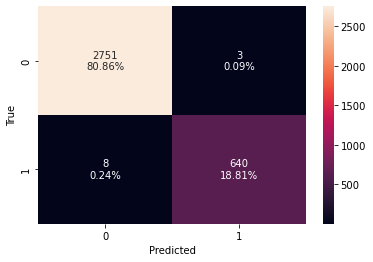

In [182]:
confusion_matrix_classification(stacking_classifier, X_train, y_train)

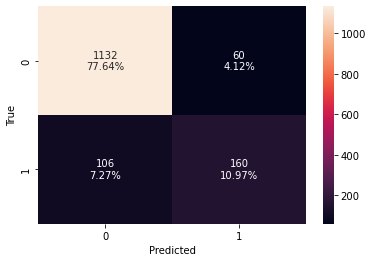

In [183]:
confusion_matrix_classification(stacking_classifier, X_test, y_test)

In [184]:
stacking_model_train_performance = classification_model_performance(stacking_classifier, X_train,y_train) 
print("Training performance \n",stacking_model_train_performance )

Training performance 
    Accuracy    Recall  Precision        F1
0  0.996767  0.987654   0.995334  0.991479


In [185]:
stacking_model_test_performance = classification_model_performance(stacking_classifier, X_test,y_test) 
print("Test performance \n",stacking_model_test_performance)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.886145  0.601504   0.727273  0.658436


#### Observation

1)The tuned AdaBoost model is overfitting, and monthly income, age, and number of trips are the three most important features of the model, but it is not a good model to predict future customers. 
2)The tuned gradient boosting model has a low recall score on the training and test sets, so it is not a good model.
3) Stacking classifier model with random forest, gradient boosting, decision tree, and XGBoost (final estimator) estimators is also overfitting.

### Comparing all models

In [186]:
models_comp = pd.concat( [dtree_model_train_performance.T,
dtree_model_test_performance.T,
Random_forest_model_train_performance.T,
Random_forest_model_test_performance.T,
Bagging_classifier_model_train_performance.T,
Bagging_classifier_model_test_performance.T,
dtree_tuned_model_train_performance.T,
dtree_tuned_model_test_performance.T,
Random_forest_tuned_model_train_performance.T,
Random_forest_tuned_model_test_performance.T,
bagging_tuned_model_train_performance.T,
bagging_tuned_model_test_performance.T,
bagging2_tuned_model_train_performance.T,
bagging2_tuned_model_test_performance.T,
ada_model_train_performance.T,
ada_model_test_performance.T,
Gradient_model_train_performance.T,
Gradient_model_test_performance.T,
XGBoost_model_train_performance.T,
XGBoost_model_test_performance.T,
ada_tuned_model_train_performance.T,
ada_model_tuned_test_performance.T,
gbc_tuned_model_train_performance.T,
gbc_model_tuned_test_performance.T,
stacking_model_train_performance.T,
stacking_model_test_performance.T,
                                
],
    axis=1,)

models_comp.columns = [
    "Decision Tree Train",
    "Decision Tree Test",
    "Random Forest Train",
    "Random Forest Test",
    "Bagging Classifier Train",
    "Bagging Classifier Test",
    "Decision Tree Tuned Train",
    "Decision Tree Tuned Test",
    "Random Forest Tuned Train",
    "Random Forest Tuned Test",
    "Bagging Classifier Tuned Train",
    "Bagging Classifier Tuned Test",
    "Bagging Classifier Tuned Est Log Train",
    "Bagging Classifier Tuned Est Log Test",
    "Adaboost Classifier Train",
    "Adaboost Classifier Test",
    "Gradient Boost Classifier Train",
    "Gradient Boost Classifier Test",
    "XGBoost Classifier Train",
    "XGBoost Classifier Test",
    "Adabosst Classifier Tuned Train",
    "Adabosst Classifier Tuned Test",
    "Gradient Boost Classifier Tuned Train",
    "Gradient Boost Classifier Tuned Test",
    "Stacking Classifier Train",
     "Stacking Classifier Test"]

In [187]:
models_comp

,Decision Tree Train,Decision Tree Test,Random Forest Train,Random Forest Test,Bagging Classifier Train,Bagging Classifier Test,Decision Tree Tuned Train,Decision Tree Tuned Test,Random Forest Tuned Train,Random Forest Tuned Test,Bagging Classifier Tuned Train,Bagging Classifier Tuned Test,Bagging Classifier Tuned Est Log Train,Bagging Classifier Tuned Est Log Test,Adaboost Classifier Train,Adaboost Classifier Test,Gradient Boost Classifier Train,Gradient Boost Classifier Test,XGBoost Classifier Train,XGBoost Classifier Test,Adabosst Classifier Tuned Train,Adabosst Classifier Tuned Test,Gradient Boost Classifier Tuned Train,Gradient Boost Classifier Tuned Test,Stacking Classifier Train,Stacking Classifier Test
Accuracy,1.0,0.868999,1.0,0.895062,0.995003,0.890261,0.996473,0.858711,0.701940,0.665981,1.0,0.897805,0.190476,0.182442,0.848031,0.828532,0.883010,0.856653,0.995885,0.897119,0.994121,0.868999,0.915638,0.858711,0.996767,0.886145
Recall,1.0,0.657895,1.0,0.515038,0.978395,0.567669,0.981481,0.676692,0.700617,0.691729,1.0,0.560150,1.000000,1.000000,0.325617,0.285714,0.473765,0.398496,0.978395,0.609023,0.975309,0.601504,0.608025,0.436090,0.987654,0.601504
Precision,1.0,0.636364,1.0,0.850932,0.995290,0.770408,1.000000,0.600000,0.356358,0.312394,1.0,0.823204,0.190476,0.182442,0.725086,0.558824,0.843407,0.683871,1.000000,0.778846,0.993711,0.653061,0.922717,0.674419,0.995334,0.727273
F1,1.0,0.646950,1.0,0.641686,0.986770,0.653680,0.990654,0.636042,0.472425,0.430409,1.0,0.666667,0.320000,0.308585,0.449414,0.378109,0.606719,0.503563,0.989080,0.683544,0.984424,0.626223,0.733023,0.529680,0.991479,0.658436


# Conclusion

1) Recall score is used as an evaluation metric of the models. 
2) The bagging classifier with logistic regression estimator model has a very high recall score and detect all actual buyers but has a problem detecting, not buyers (Precision score is so low, there is very high false positive). 
3) The tuned random forest can predict future customers because it is not overfitting and has a better recall score than the other models on test sets except the bagging classifier with logistic regression estimator.
4) Monthly income, designation_executive and passport are the three most important features of the tuned random forest model
